In [ ]:
#Assignment from the first link: "https://www.kaggle.com/code/agrawaladitya/step-by-step-data-preprocessing-eda"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mc_df = pd.read_json('modcloth_final_data.json', lines=True)
mc_df.head()


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [ ]:
mc_df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [ ]:
mc_df.columns = mc_df.columns.str.replace(' ', '_').str.lower()

In [ ]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27914 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [ ]:
missing_data = pd.DataFrame({'total_missing': mc_df.isnull().sum(), 'perc_missing': (mc_df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


In [ ]:
mc_df.describe()

,item_id,waist,size,quality,hips,bra_size,user_id,shoe_size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27914.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.144748
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.324130
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,11.500000


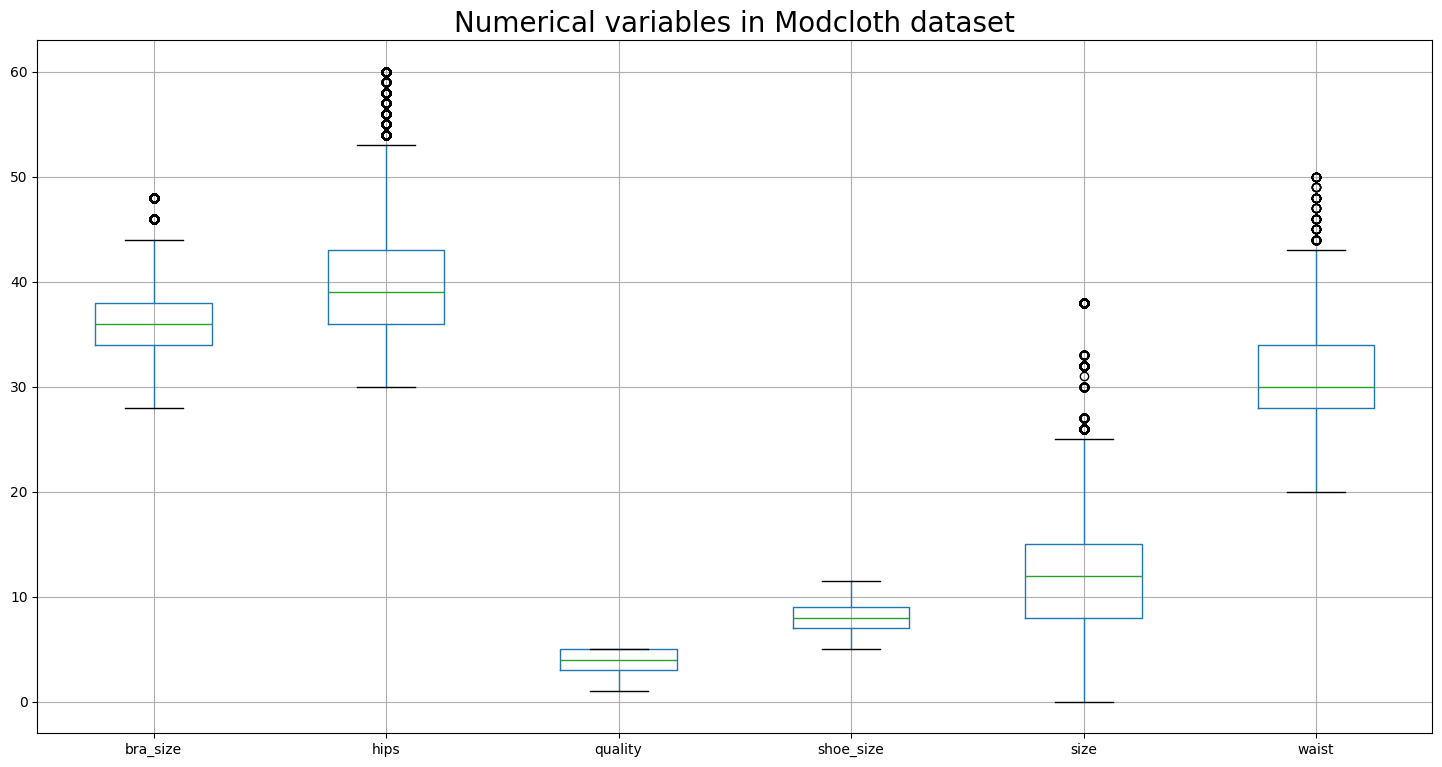

In [ ]:
num_cols = ['bra_size','hips','quality','shoe_size','size','waist']
plt.figure(figsize=(18,9))
mc_df[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

In [ ]:
mc_df[mc_df.shoe_size == 38]

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text


In [ ]:
mc_df.at[37313,'shoe_size'] = None

In [ ]:
mc_df.sort_values(by=['bra_size'], ascending=False).head(10)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...
57273,645822,NaN,32,5.0,ddd/f,55.0,48.0,tops,NaN,5ft,Lillie,just right,fit,732268,NaN,NaN,I wear this almost every,I wear this almost every single day! Yay! Some...
14033,171125,NaN,38,3.0,c,NaN,48.0,dresses,NaN,5ft 8in,dillsyrpickle,just right,small,416697,NaN,NaN,So I really wanted to lov,So I really wanted to love this dress. I'm a ...
28845,401773,NaN,26,3.0,b,55.0,48.0,new,50,5ft 6in,Michelle,just right,fit,340392,9.5,wide,These cardigans are a gre,These cardigans are a great way to achieve tha...
22637,353933,NaN,38,5.0,b,NaN,48.0,dresses,NaN,5ft 2in,Meghan,slightly long,fit,175295,NaN,NaN,No negatives to this dres,"No negatives to this dress, it's absolutely go..."
38063,417269,NaN,38,4.0,c,NaN,48.0,new,NaN,5ft 6in,Bea,very long,fit,799178,NaN,NaN,"I love the fabric, I love","I love the fabric, I love long tops, this one ..."


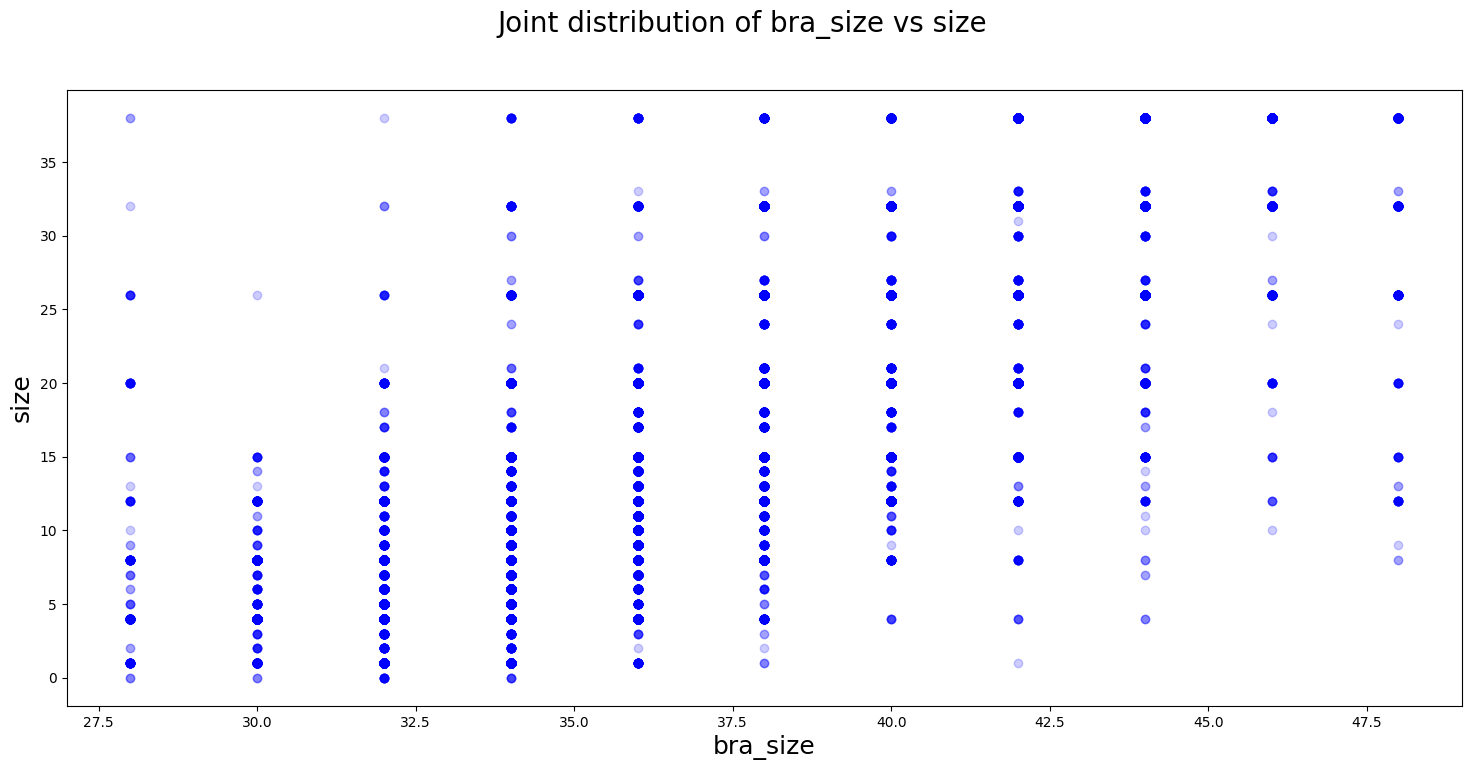

In [ ]:
plt.figure(figsize=(18,8))
plt.xlabel("bra_size", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of bra_size vs size", fontsize= 20)
plt.plot(mc_df.bra_size, mc_df['size'], 'bo', alpha=0.2)
plt.show()

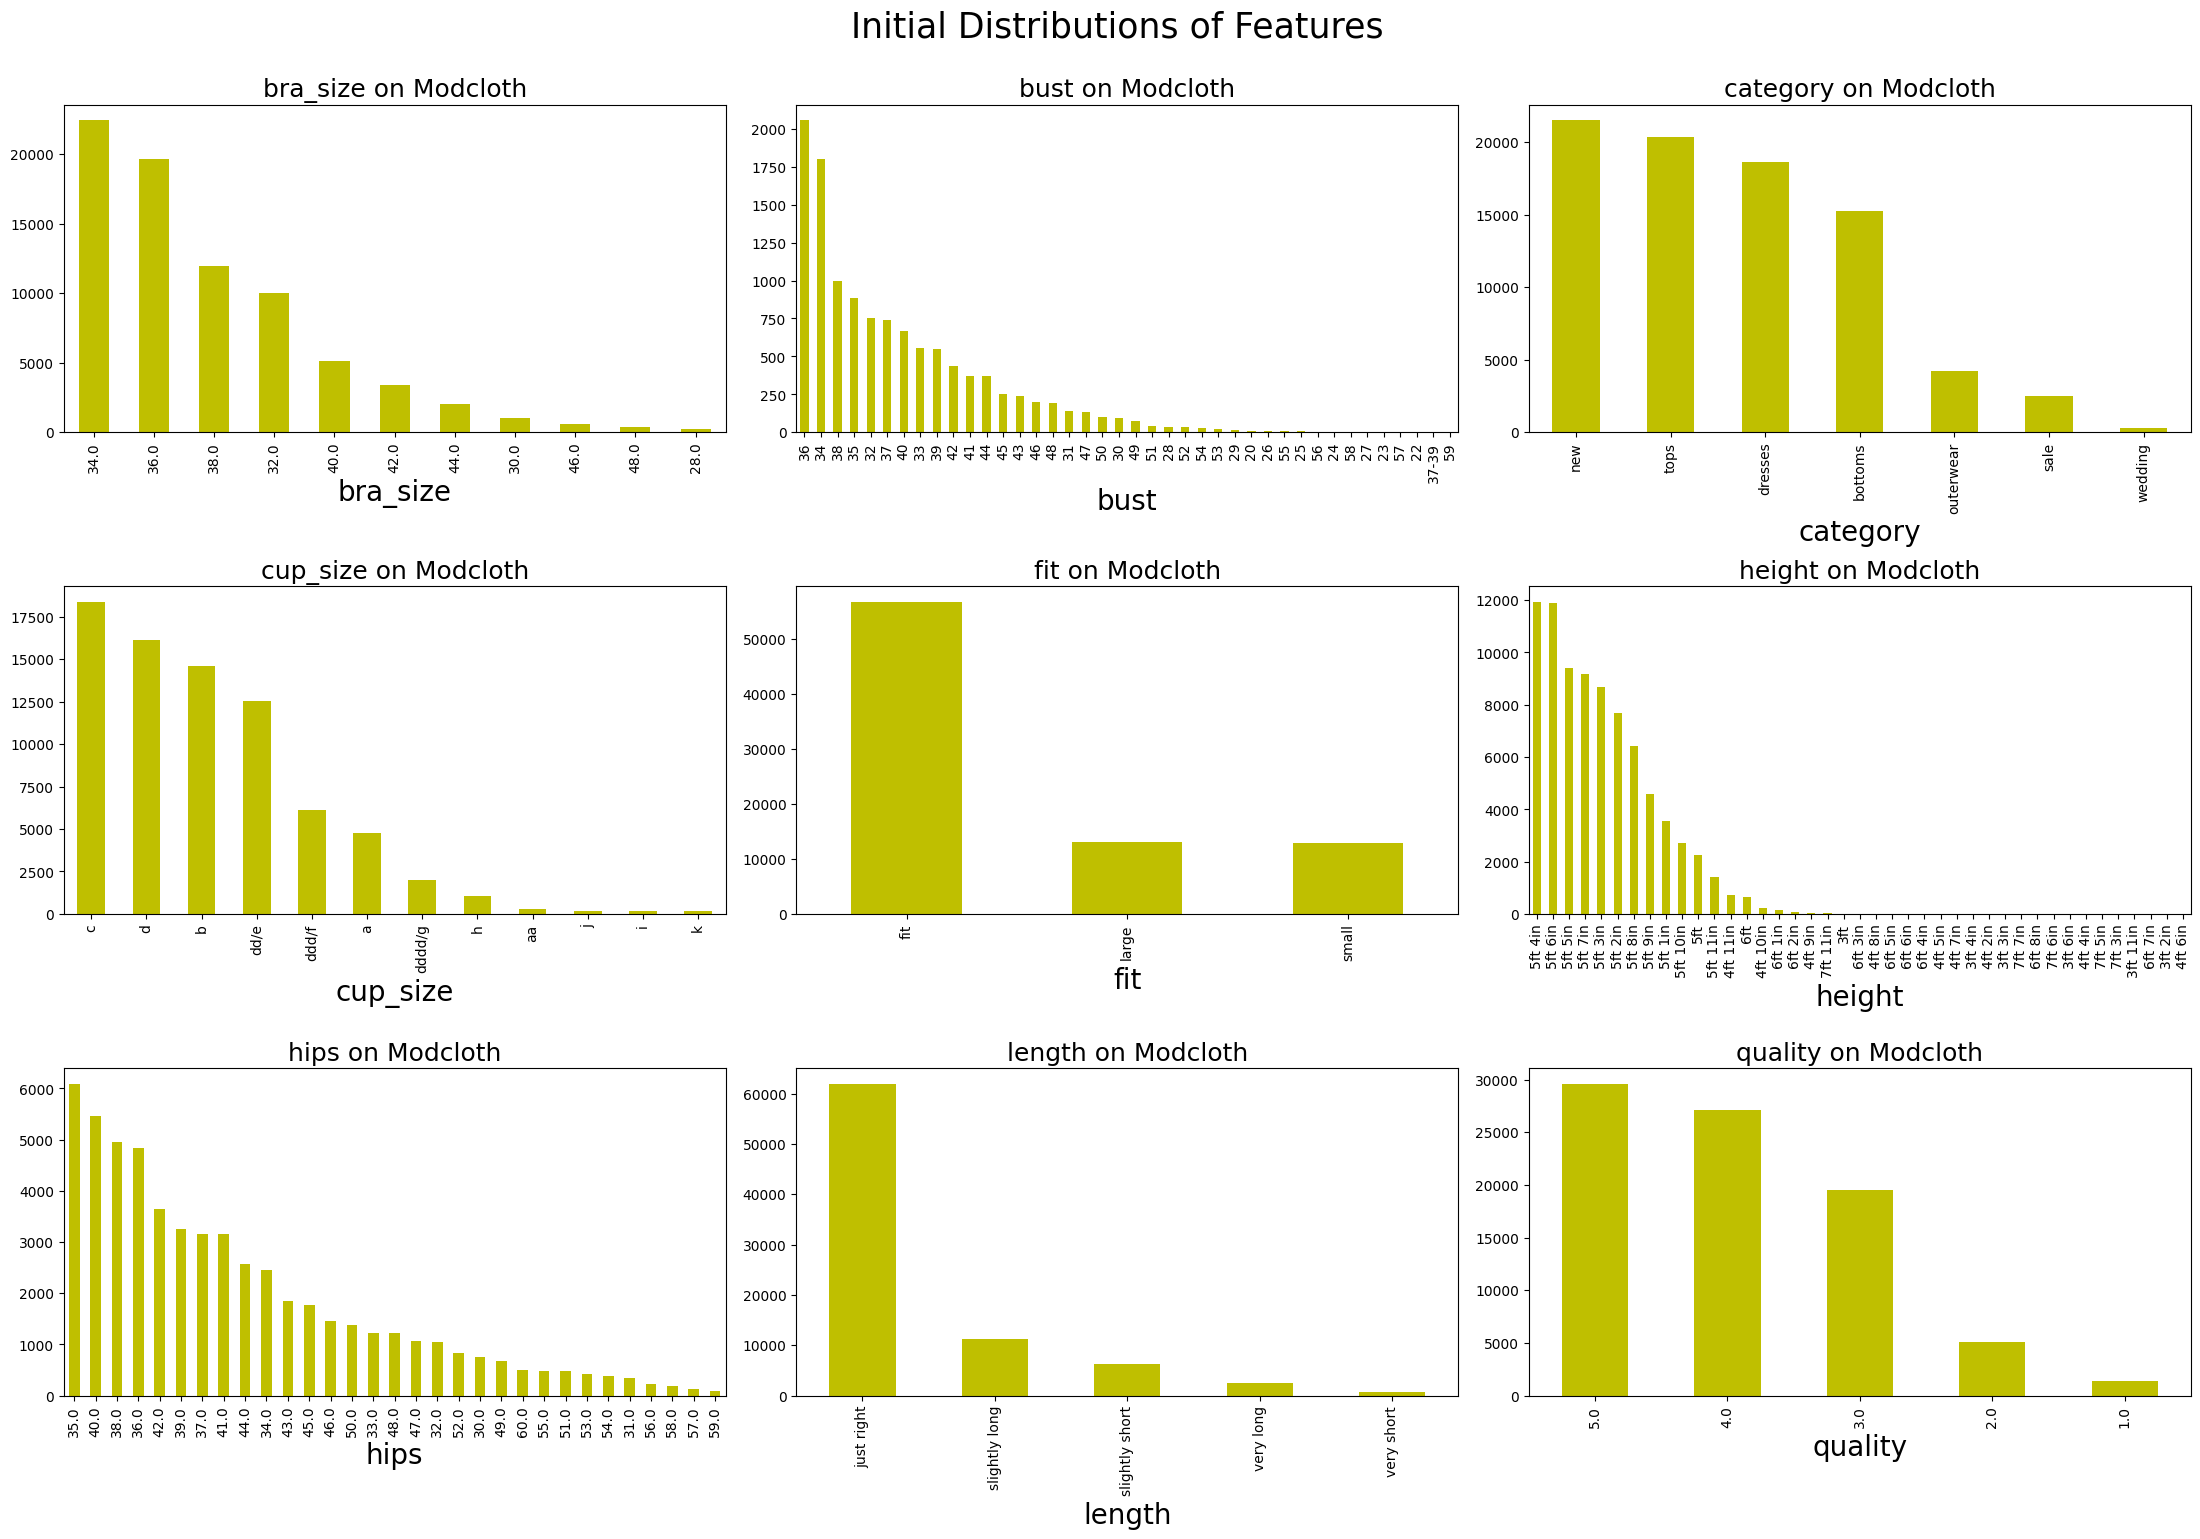

In [ ]:
def plot_dist(col, ax):
    """
    Plots the distribution of a column.
    For numeric columns, it will skip NaN values and plot value counts as a bar chart.
    """
    mc_df[col][mc_df[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)  # Fixed here
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize=18)
    return ax

# Create subplots
f, ax = plt.subplots(3, 3, figsize=(22, 15))  # Assuming 9 features to plot
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra_size', 'bust', 'category', 'cup_size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0

# Loop through subplots and plot distributions
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1

# Add a title to the figure
plt.suptitle("Initial Distributions of Features", fontsize=25)
plt.show()

In [ ]:
mc_df.bra_size = mc_df.bra_size.fillna('Unknown')
mc_df.bra_size = mc_df.bra_size.astype('category').cat.as_ordered()
mc_df.at[37313,'bust'] = '38'
mc_df.bust = mc_df.bust.fillna(0).astype(int)
mc_df.category = mc_df.category.astype('category')

In [ ]:
mc_df[mc_df.cup_size.isnull()].sample(20)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
79642,785517,NaN,4,4.0,NaN,NaN,Unknown,outerwear,0,5ft 1in,Asuka,just right,large,639974,NaN,NaN,had been looking for a no,had been looking for a noncheap looking leathe...
76208,757731,NaN,12,4.0,NaN,39.0,Unknown,bottoms,0,5ft 7in,Marissa,just right,fit,395272,NaN,NaN,These jeans are great! Su,These jeans are great! Super flattering for an...
44388,481011,NaN,15,3.0,NaN,NaN,Unknown,tops,0,5ft 8in,miss_soedira,just right,fit,210708,NaN,NaN,I've been wearing this tu,I've been wearing this tunic a lot since I hot...
66211,693560,NaN,15,3.0,NaN,50.0,Unknown,bottoms,0,5ft 6in,alyssadarling20,just right,fit,542201,NaN,NaN,Perfect for any style and,Perfect for any style and amazing quality!
6948,152702,NaN,8,4.0,NaN,NaN,Unknown,new,0,5ft 6in,Meowster,just right,fit,737718,NaN,NaN,It definitely shows off y,It definitely shows off your curves and I love...
14689,175156,NaN,18,5.0,NaN,NaN,Unknown,dresses,0,5ft 6in,Jamie,just right,fit,670756,NaN,NaN,I couldn't be happier wit,I couldn't be happier with this dress! Great q...
72700,752094,NaN,1,5.0,NaN,36.0,Unknown,bottoms,0,5ft 5in,blupearl16,just right,fit,265802,NaN,NaN,Color looks great on my s,Color looks great on my sister
60511,656172,NaN,4,3.0,NaN,NaN,Unknown,bottoms,0,5ft 4in,Erica,just right,fit,133536,NaN,NaN,Easy to wear,Easy to wear
43495,477210,NaN,20,3.0,NaN,NaN,Unknown,tops,0,5ft 7in,reneek232000,just right,fit,626795,9.0,wide,I like the blouse. It is,I like the blouse. It is sheer so you have to ...
67231,698449,NaN,8,4.0,NaN,40.0,Unknown,bottoms,0,5ft 9in,Sarah Jo,just right,fit,628538,NaN,NaN,I ADORE this garment! Gre,"I ADORE this garment! Great quality, vintage f..."


In [ ]:
mc_df.cup_size.fillna('Unknown', inplace=True)
mc_df.cup_size = mc_df.cup_size.astype('category').cat.as_ordered()

mc_df.fit = mc_df.fit.astype('category')

<ipython-input-35-df92ef45967d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mc_df.cup_size.fillna('Unknown', inplace=True)


In [ ]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try:
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
mc_df.height = mc_df.height.apply(get_cms)

In [ ]:
mc_df[mc_df.height.isnull()].head(20)
# Do look at the output to be able to better understand the inferences!

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
43,123373,NaN,15,5.0,dd/e,NaN,36.0,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,NaN,NaN
73,124124,NaN,20,4.0,c,NaN,38.0,new,0,NaN,Fiorella,just right,large,816504,NaN,NaN,NaN,NaN
131,124124,NaN,12,3.0,c,NaN,36.0,new,0,NaN,jmcrowder.1124,very short,fit,846091,NaN,NaN,NaN,NaN
213,124124,NaN,20,4.0,d,NaN,40.0,new,0,NaN,rhea_heather,just right,fit,121007,NaN,NaN,NaN,NaN
382,125442,NaN,5,5.0,b,NaN,34.0,new,0,NaN,kelsi.flatland,just right,large,5752,NaN,NaN,NaN,NaN
423,125442,NaN,7,5.0,c,NaN,34.0,new,0,NaN,Naomi,just right,fit,563612,NaN,NaN,NaN,NaN
456,125442,NaN,7,5.0,b,NaN,38.0,new,0,NaN,shirawzn,just right,fit,968605,NaN,NaN,NaN,NaN
475,125442,NaN,7,5.0,dd/e,36.0,30.0,new,0,NaN,Ingrid,just right,small,940714,NaN,NaN,NaN,NaN


In [ ]:
print(mc_df[((mc_df.bra_size != 'Unknown') | (mc_df.cup_size != 'Unknown')) & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull()) & (mc_df.waist.isnull())].head(3))
print(mc_df[(mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     ((mc_df.shoe_size.notnull()) | (mc_df.shoe_width.notnull())) & (mc_df.waist.isnull())].head(3))
print(mc_df[(mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & ((mc_df.hips.notnull()) | (mc_df.waist.notnull())) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull())].head(3))

    item_id  waist  size  quality cup_size  hips bra_size category  bust  \
3    123373    NaN    21      5.0     dd/e   NaN  Unknown      new     0   
17   123373    NaN    15      4.0   dddd/g   NaN     36.0      new     0   
43   123373    NaN    15      5.0     dd/e   NaN     36.0      new     0   

    height     user_name      length    fit  user_id  shoe_size shoe_width  \
3      NaN  alexmeyer626  just right    fit   875643        NaN        NaN   
17     NaN         Megan  just right  large   128353        NaN        NaN   
43     NaN       sdhewey  just right    fit   670919        NaN        NaN   

   review_summary review_text  
3             NaN         NaN  
17            NaN         NaN  
43            NaN         NaN  
     item_id  waist  size  quality cup_size  hips bra_size category  bust  \
553   125442    NaN     7      5.0  Unknown   NaN  Unknown      new     0   
591   125442    NaN     7      3.0  Unknown   NaN  Unknown      new     0   
665   125442    NaN    

In [ ]:
lingerie_cond = (((mc_df.bra_size != 'Unknown') | (mc_df.cup_size != 'Unknown')) & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull()) & (mc_df.waist.isnull()))
shoe_cond = ((mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     ((mc_df.shoe_size.notnull()) | (mc_df.shoe_width.notnull())) & (mc_df.waist.isnull()))
dress_cond = ((mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & ((mc_df.hips.notnull()) | (mc_df.waist.notnull())) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull()))
#print(len(mc_df[lingerie_cond]))   # To check if these items add up in the final column we are adding.
#print(len(mc_df[shoe_cond]))
#print(len(mc_df[dress_cond]))
mc_df['first_time_user'] = (lingerie_cond | shoe_cond | dress_cond)
print("Column added!")
print("Total transactions by first time users who bought bra, shoes, or a dress: " + str(sum(mc_df.first_time_user)))
print("Total first time users: " + str(len(mc_df[(lingerie_cond | shoe_cond | dress_cond)].user_id.unique())))

Column added!
Total transactions by first time users who bought bra, shoes, or a dress: 903
Total first time users: 565


In [ ]:
# Handling hips column
mc_df.hips = mc_df.hips.fillna(-1.0)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
mc_df.hips = pd.cut(mc_df.hips, bins, labels=labels)

# Handling length column
missing_rows = mc_df[mc_df.length.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)

# Handling quality
missing_rows = mc_df[mc_df.quality.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)
mc_df.quality = mc_df.quality.astype('category').cat.as_ordered()

In [ ]:
from pandas.api.types import CategoricalDtype
shoe_widths_type = CategoricalDtype(categories=['Unknown','narrow','average','wide'], ordered=True)

mc_df.review_summary = mc_df.review_summary.fillna('Unknown')
mc_df.review_text = mc_df.review_text.fillna('Unkown')
mc_df.shoe_size = mc_df.shoe_size.fillna('Unknown')
mc_df.shoe_size = mc_df.shoe_size.astype('category').cat.as_ordered()
mc_df.shoe_width = mc_df.shoe_width.fillna('Unknown')
mc_df.shoe_width = mc_df.shoe_width.astype(shoe_widths_type)
mc_df.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)
missing_rows = mc_df[mc_df.height.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)

In [ ]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81594 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          81594 non-null  int64   
 1   size             81594 non-null  int64   
 2   quality          81594 non-null  category
 3   cup_size         81594 non-null  category
 4   hips             81594 non-null  category
 5   bra_size         81594 non-null  category
 6   category         81594 non-null  category
 7   height           81594 non-null  float64 
 8   length           81594 non-null  object  
 9   fit              81594 non-null  category
 10  user_id          81594 non-null  int64   
 11  shoe_size        81594 non-null  category
 12  shoe_width       81594 non-null  category
 13  review_summary   81594 non-null  object  
 14  review_text      81594 non-null  object  
 15  first_time_user  81594 non-null  bool    
dtypes: bool(1), category(8), float64(1), int64(3)

In [ ]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)

def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

In [ ]:
mc_df.category.value_counts()

,count
category,
new,21177
tops,20048
dresses,18402
bottoms,15047
outerwear,4180
sale,2469
wedding,271


<ipython-input-46-15b1021e87bb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g_by_category = mc_df.groupby('category')
<ipython-input-44-a37c607149ec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
<ipython-input-44-a37c607149ec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
<ipython-input-44-a37c6

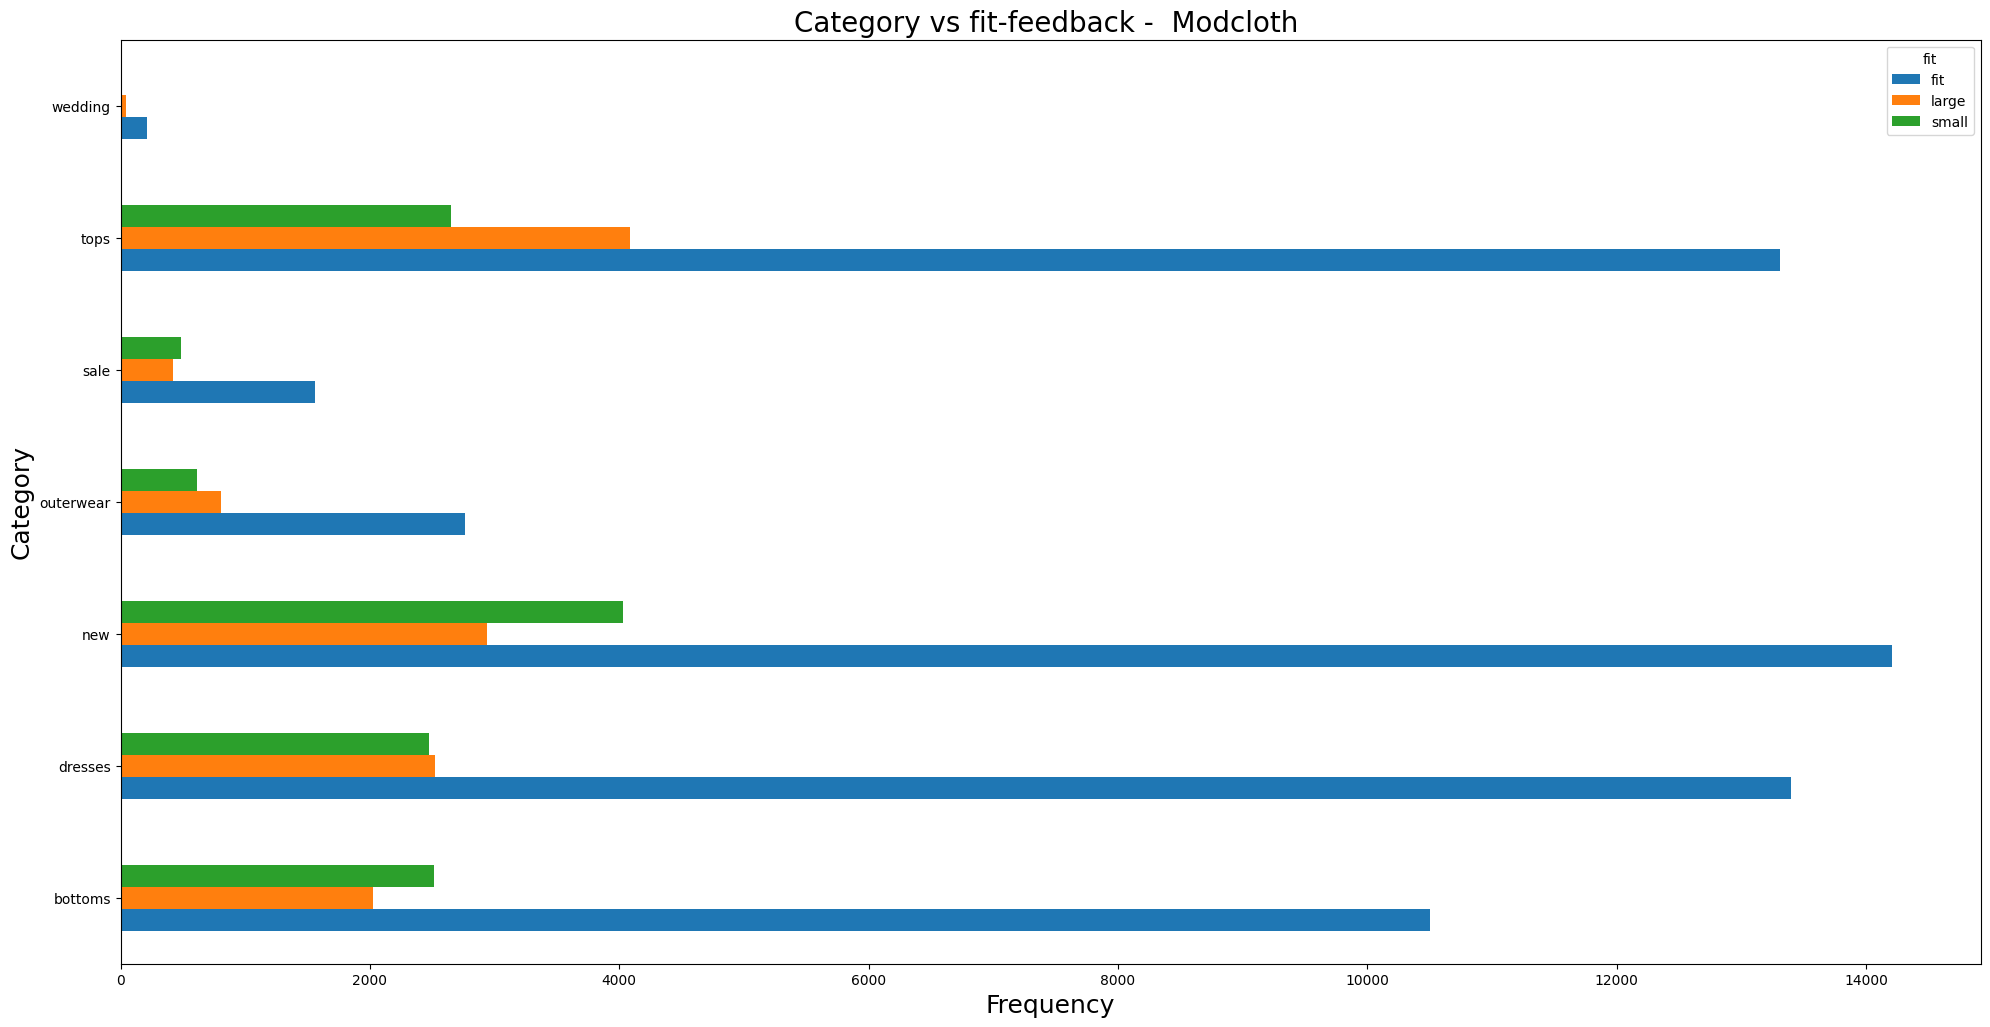

In [ ]:
g_by_category = mc_df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit')

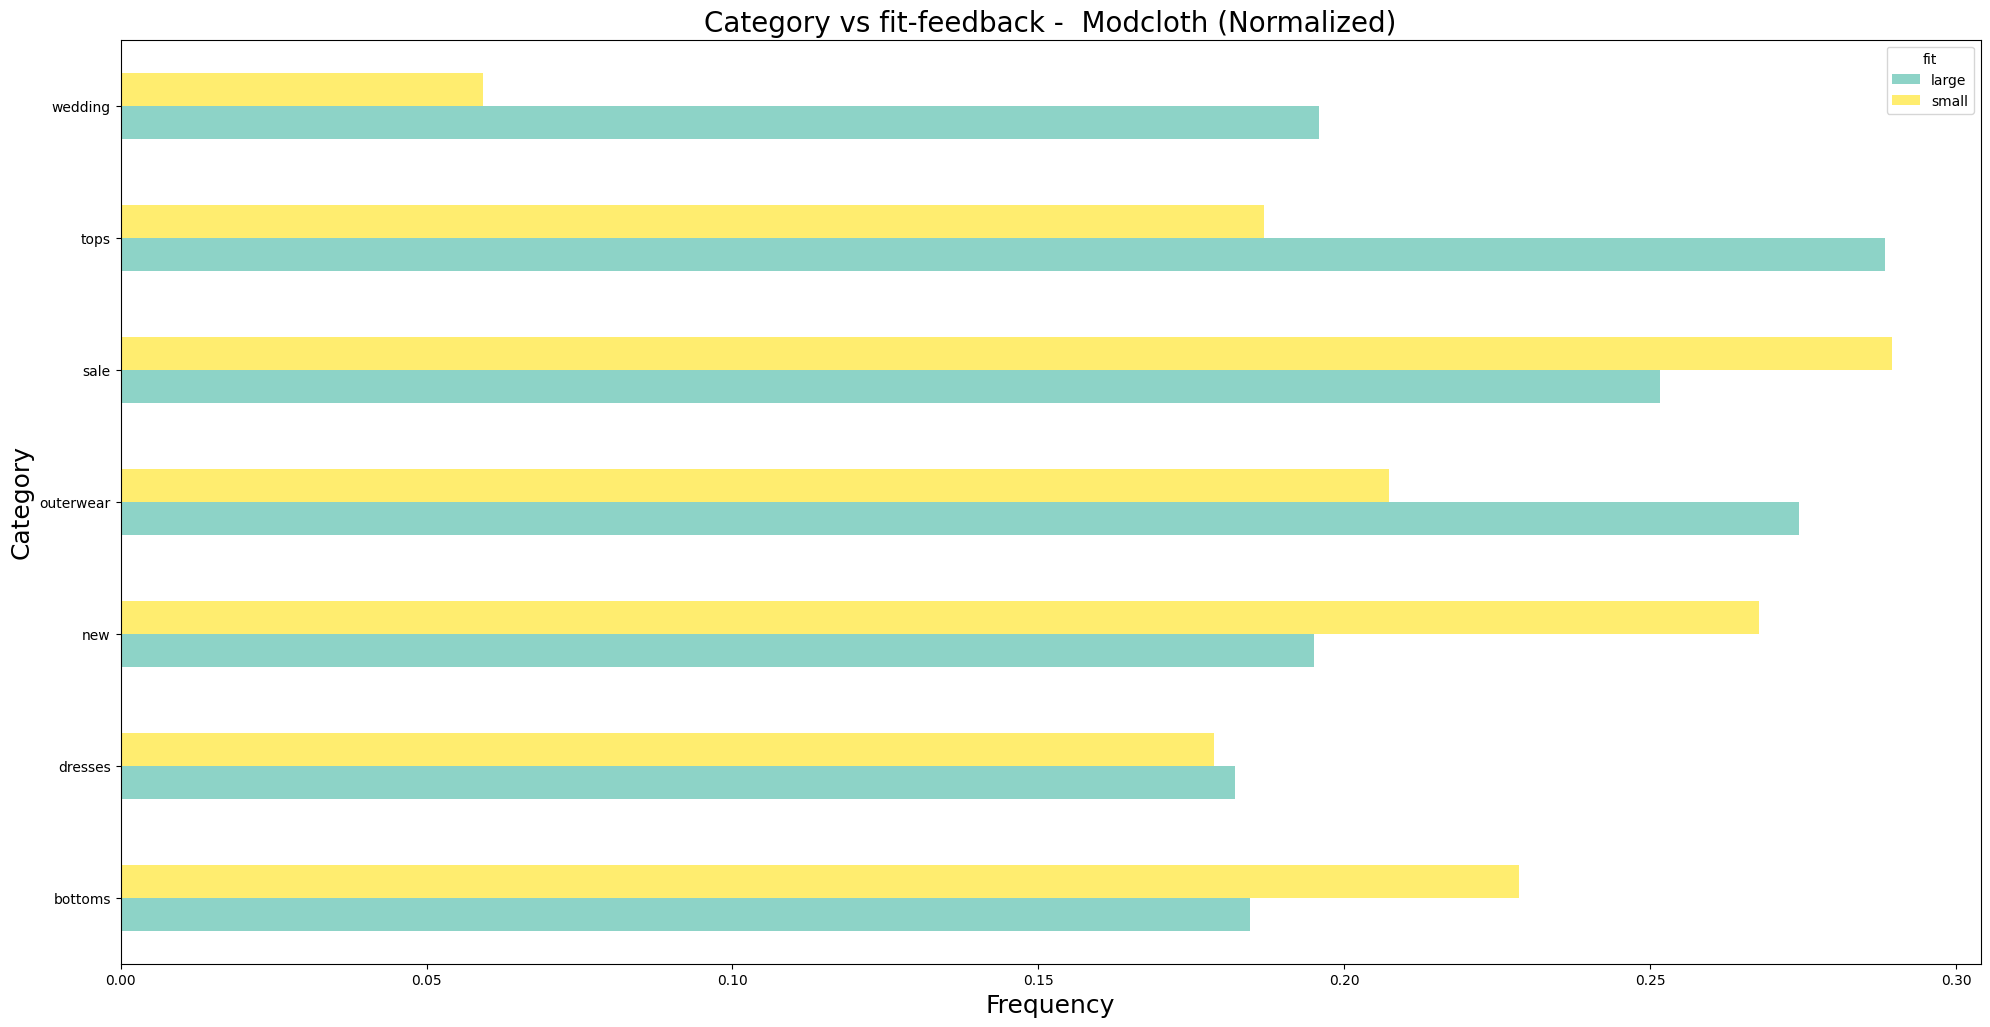

In [ ]:
plot_barh(cat_fit_norm, 'fit', norm=1, cmap='Set3')

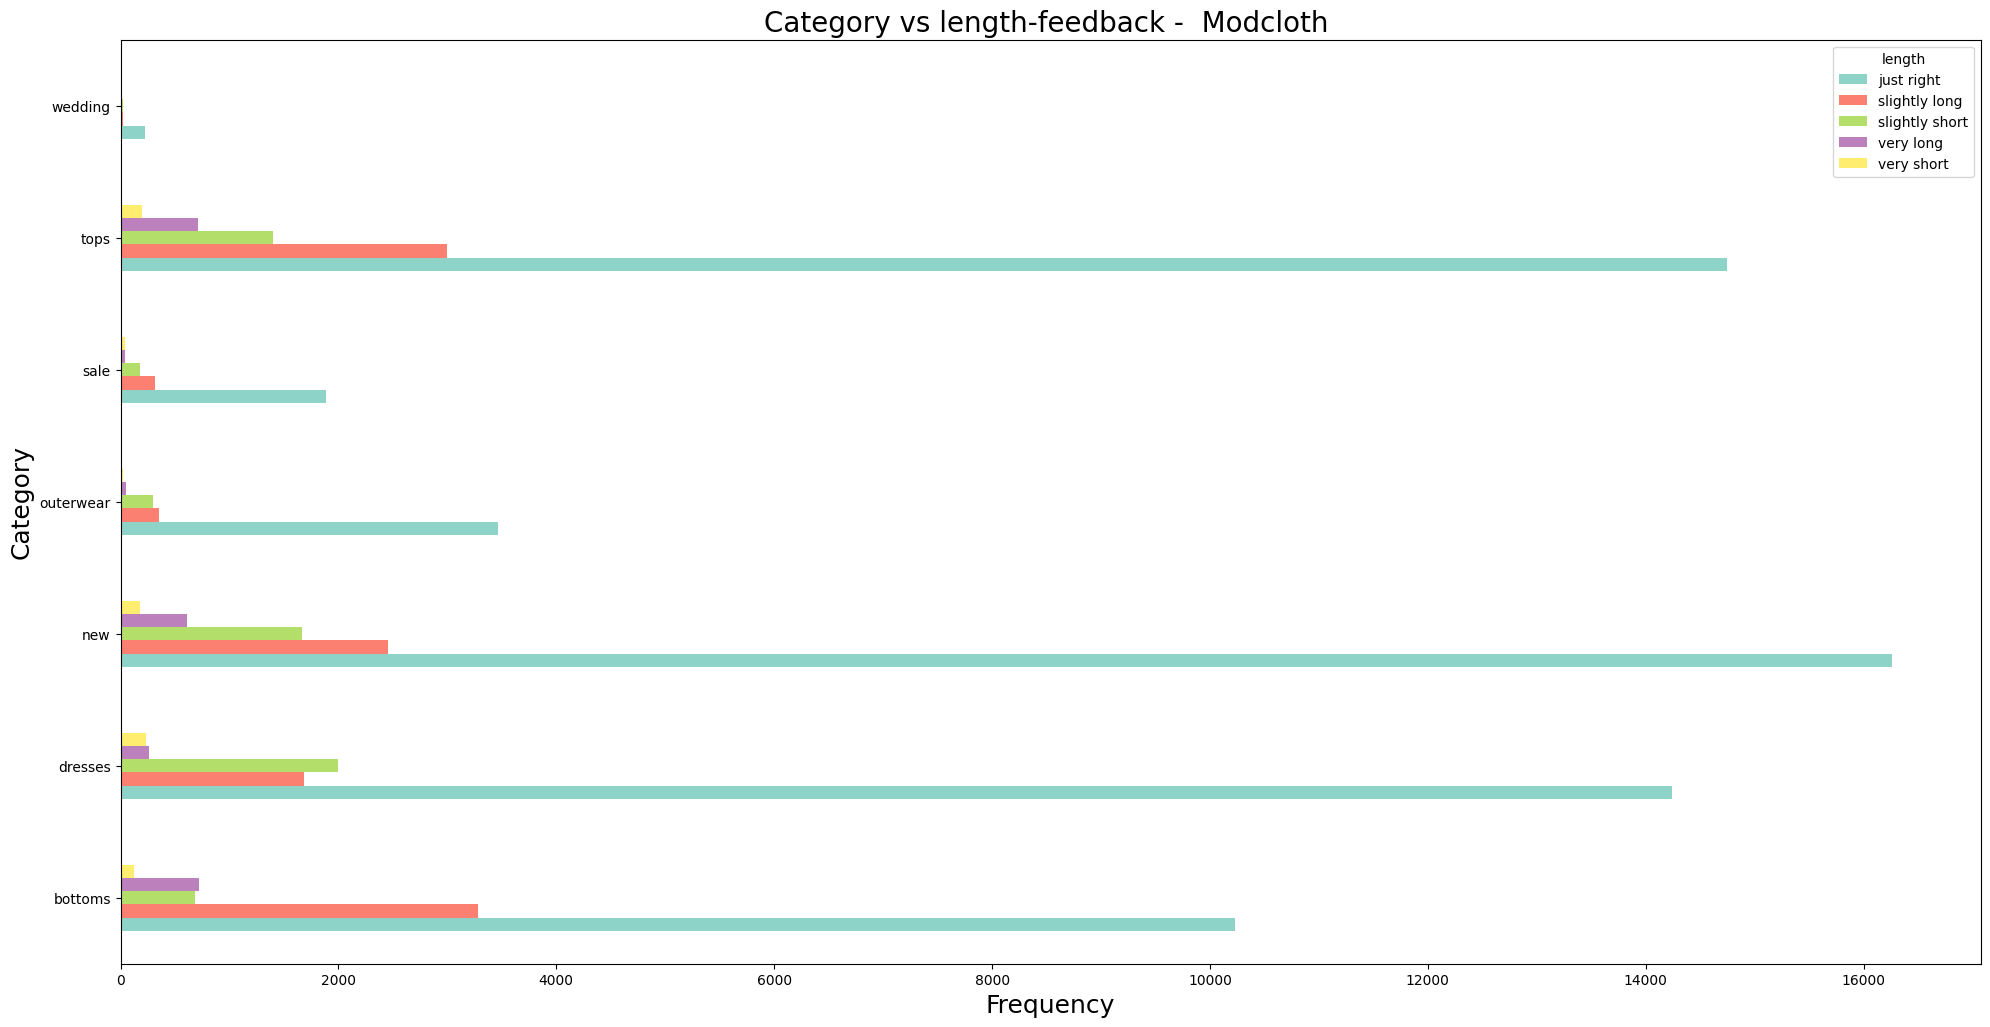

In [ ]:
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length', 'Set3')

<ipython-input-44-a37c607149ec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
<ipython-input-44-a37c607149ec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
<ipython-input-44-a37c607149ec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
<ipytho

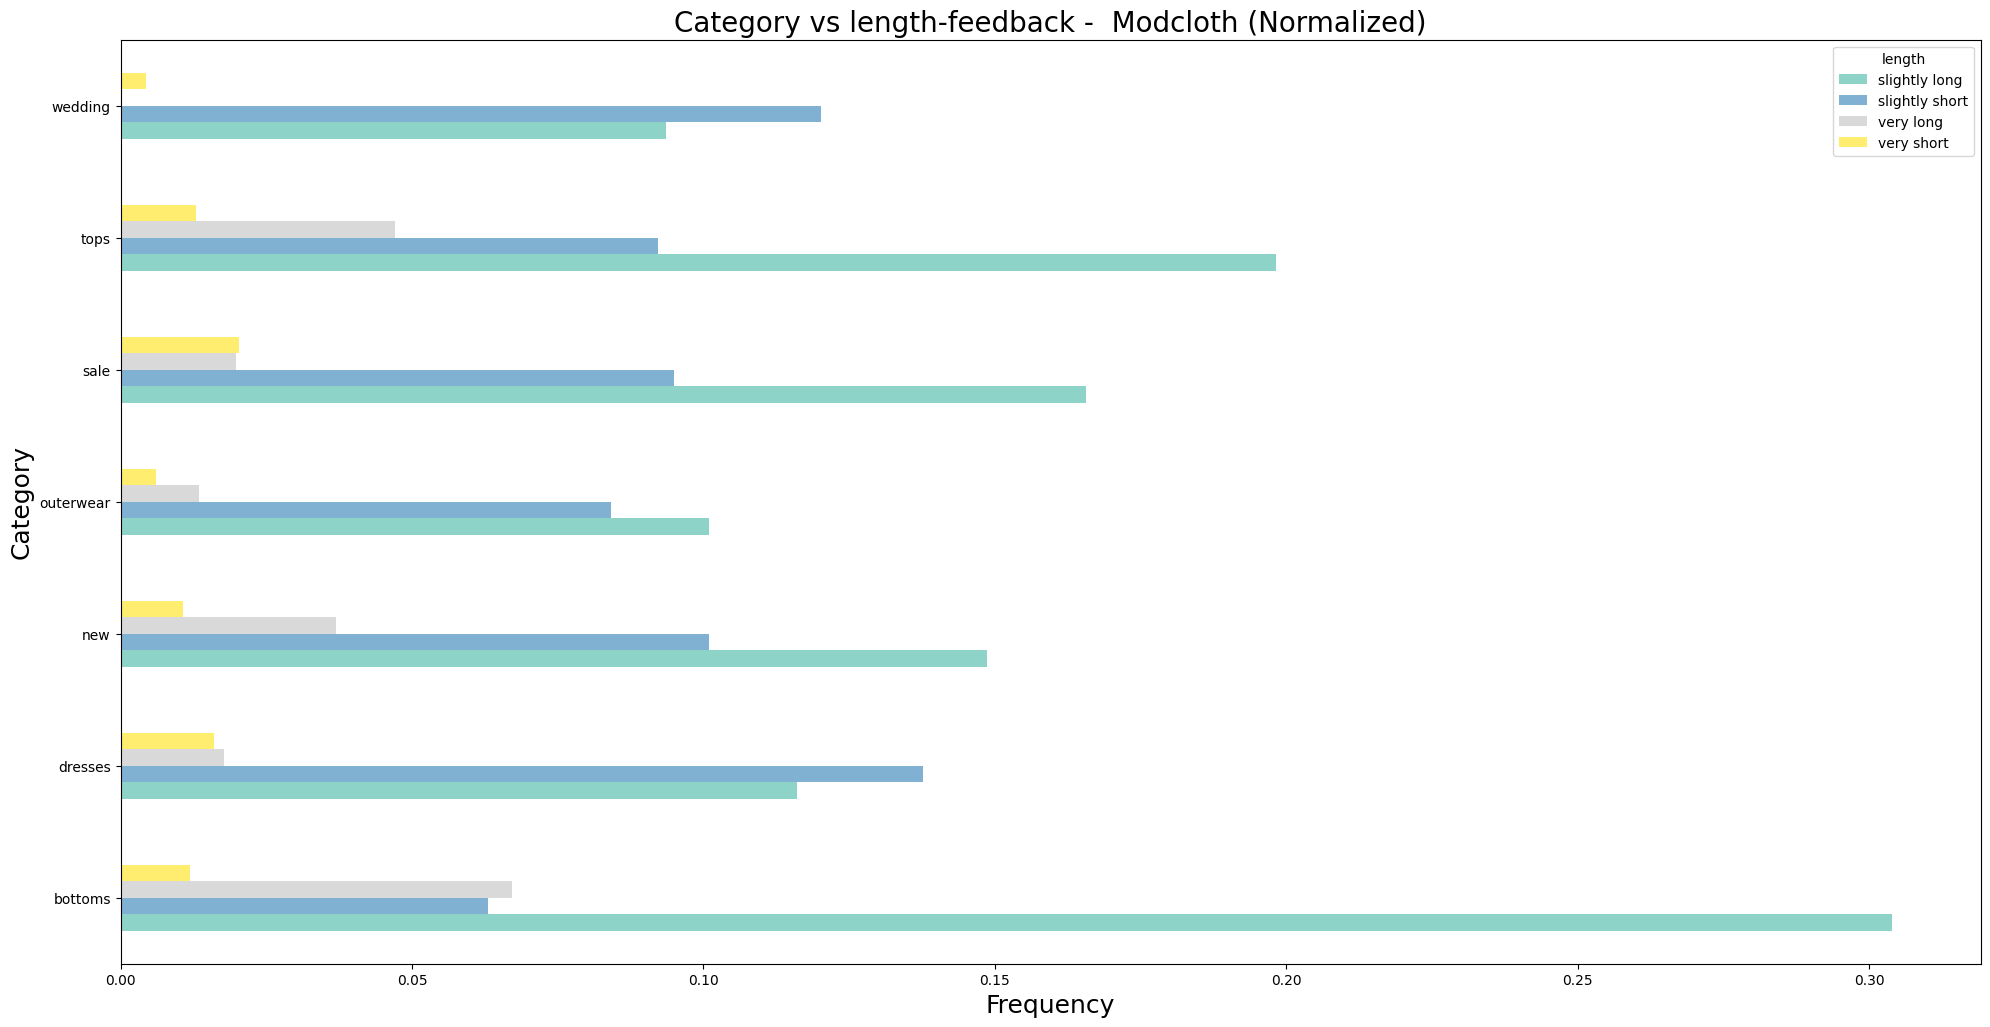

In [ ]:
cat_len_norm = norm_counts(cat_len)
cat_len_norm.drop(['just right'], axis = 1, inplace=True)
plot_barh(cat_len_norm, 'length', cmap='Set3', norm=1)

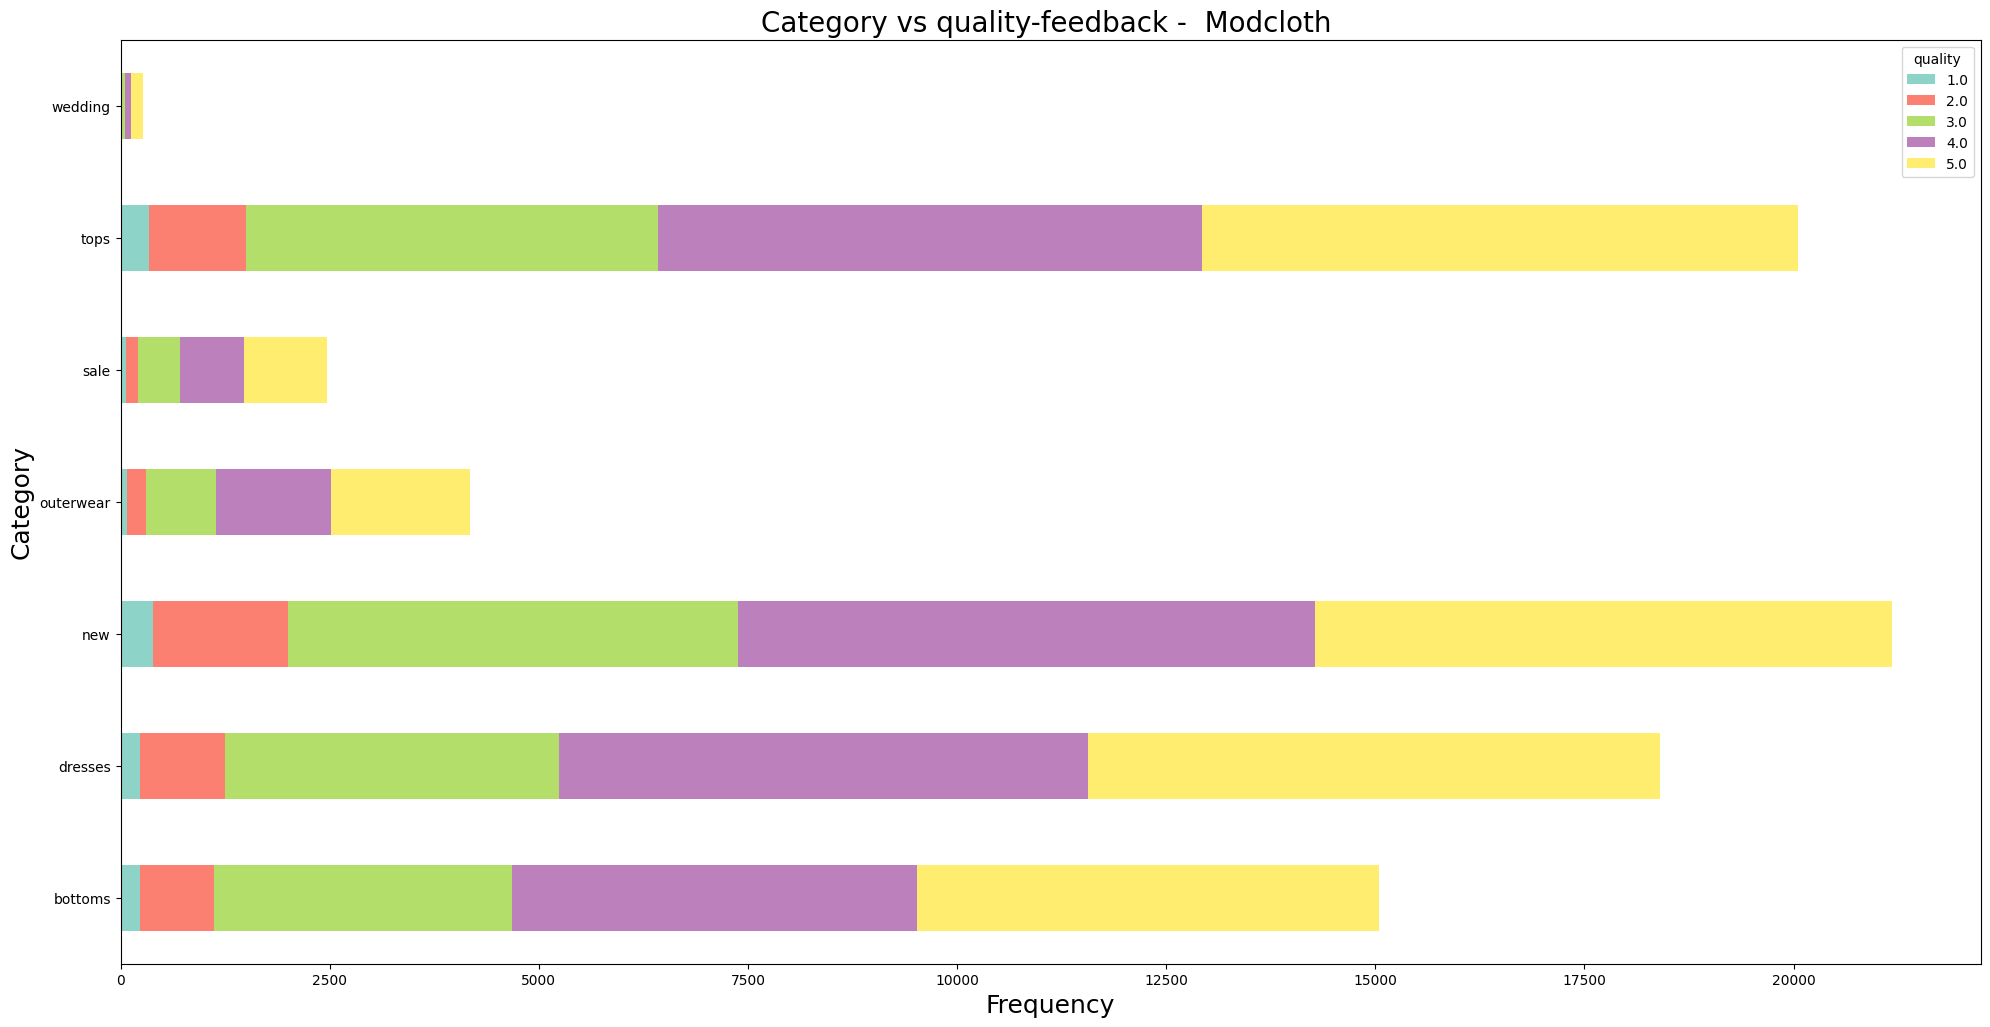

In [ ]:
cat_quality = g_by_category['quality'].value_counts()
cat_quality = cat_quality.unstack()
plot_barh(cat_quality, 'quality', 'Set3', stacked=1)

<ipython-input-44-a37c607149ec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
<ipython-input-44-a37c607149ec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
<ipython-input-44-a37c607149ec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
<ipytho

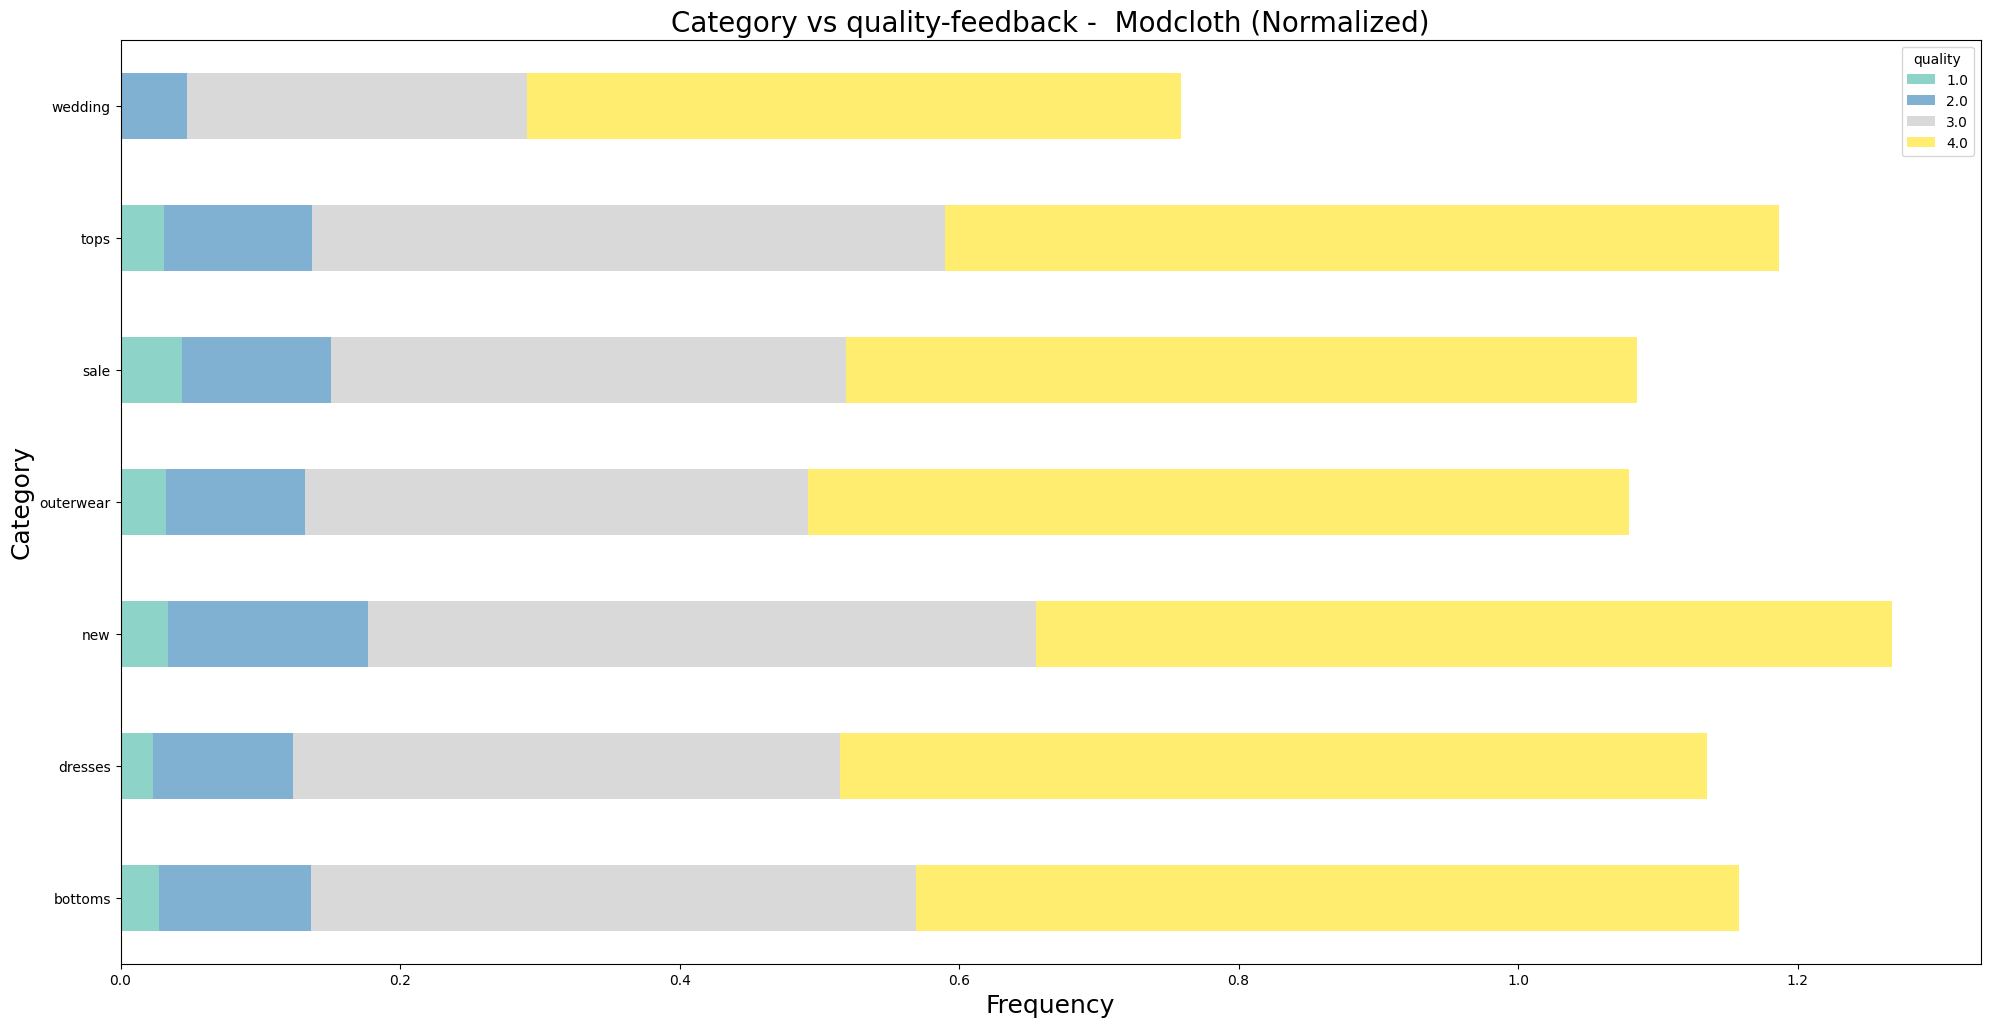

In [ ]:
cat_quality_norm = norm_counts(cat_quality)
cat_quality_norm.drop([5.0], axis = 1, inplace=True)
plot_barh(cat_quality_norm, 'quality', 'Set3', stacked=1, norm=1)

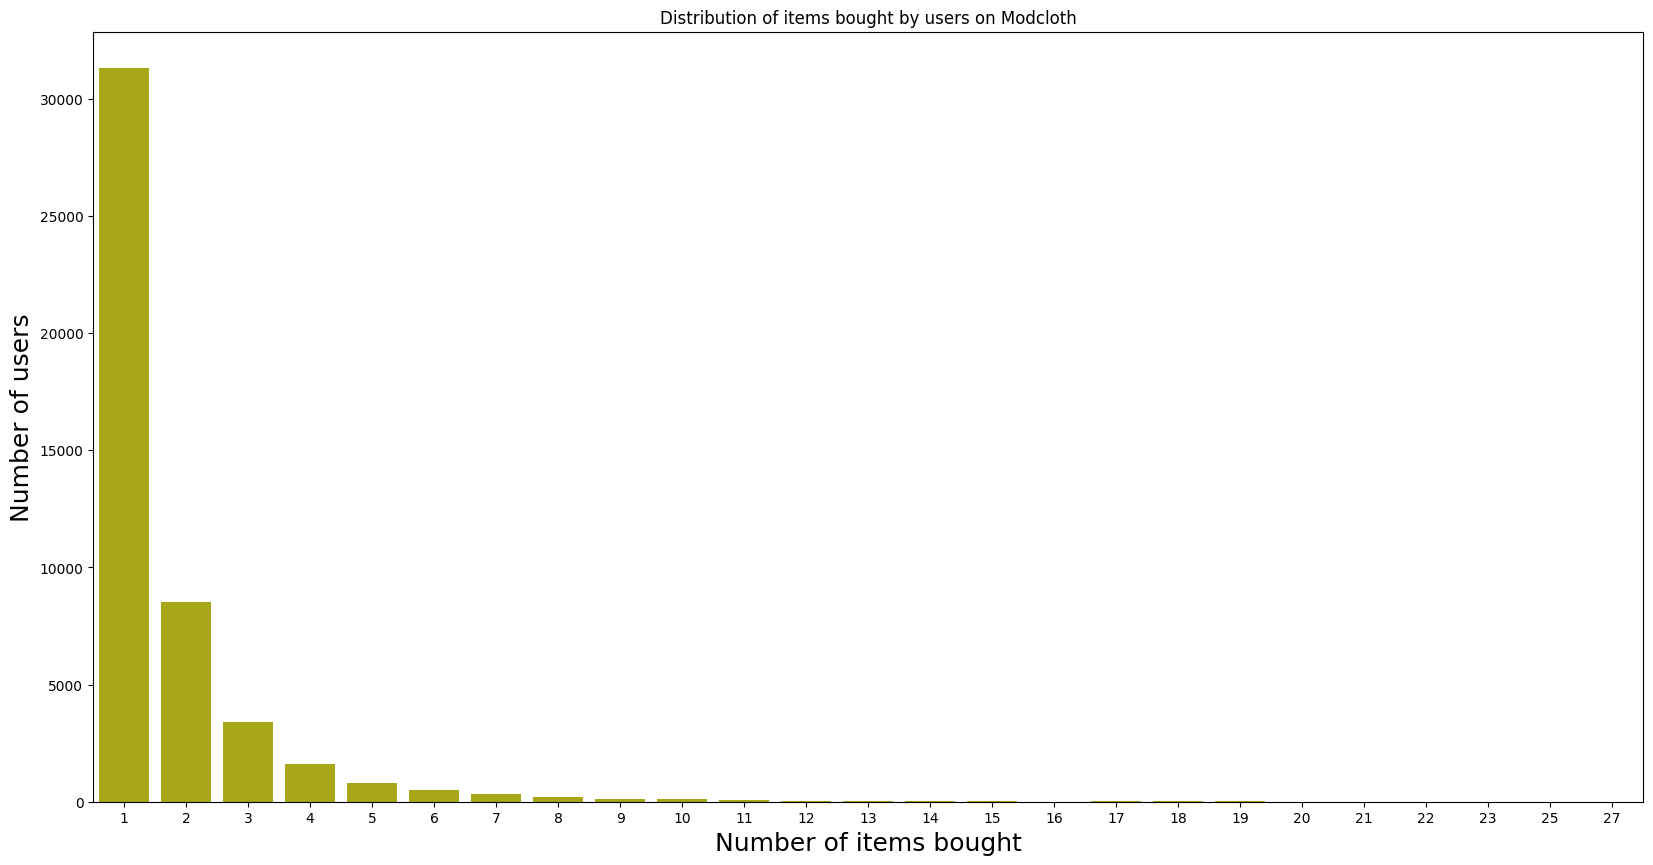

In [ ]:
import seaborn as sns
# Users who bought so many items
items_bought = []
total_users = []
for i in range(min(mc_df.user_id.value_counts()), max(mc_df.user_id.value_counts())+1):
    all_users = sum(mc_df.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize = 18)
plt.ylabel("Number of users", fontsize = 18)
plt.title("Distribution of items bought by users on Modcloth")
__ = sns.barplot(x=items_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(20,10)

<ipython-input-59-b00d6a238cd2>:14: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='shoe_size', y='height', data=mc_df, scale='width')


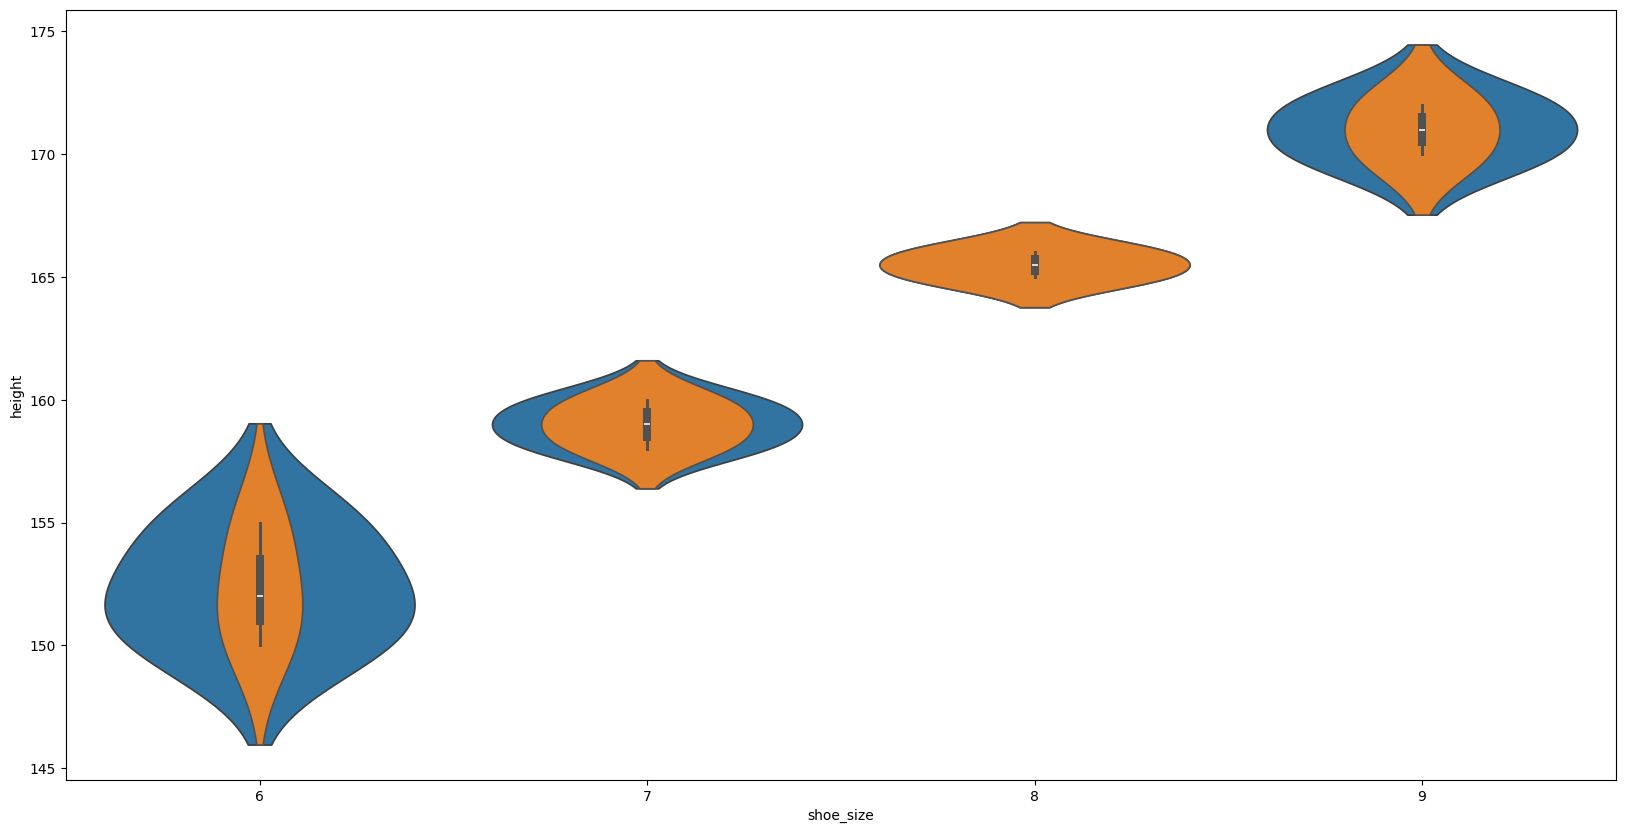

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace with your actual `mc_df`)
import pandas as pd
data = {'shoe_size': [6, 7, 6, 8, 9, 6, 7, 8, 9, 7],
        'height': [150, 160, 155, 165, 170, 152, 158, 166, 172, 159]}
mc_df = pd.DataFrame(data)

# Adjust the figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)

sns.violinplot(x='shoe_size', y='height', data=mc_df, scale='width')
# Create the violin plot
sns.violinplot(x='shoe_size', y='height', data=mc_df)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/sample_data/Loan_Default.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

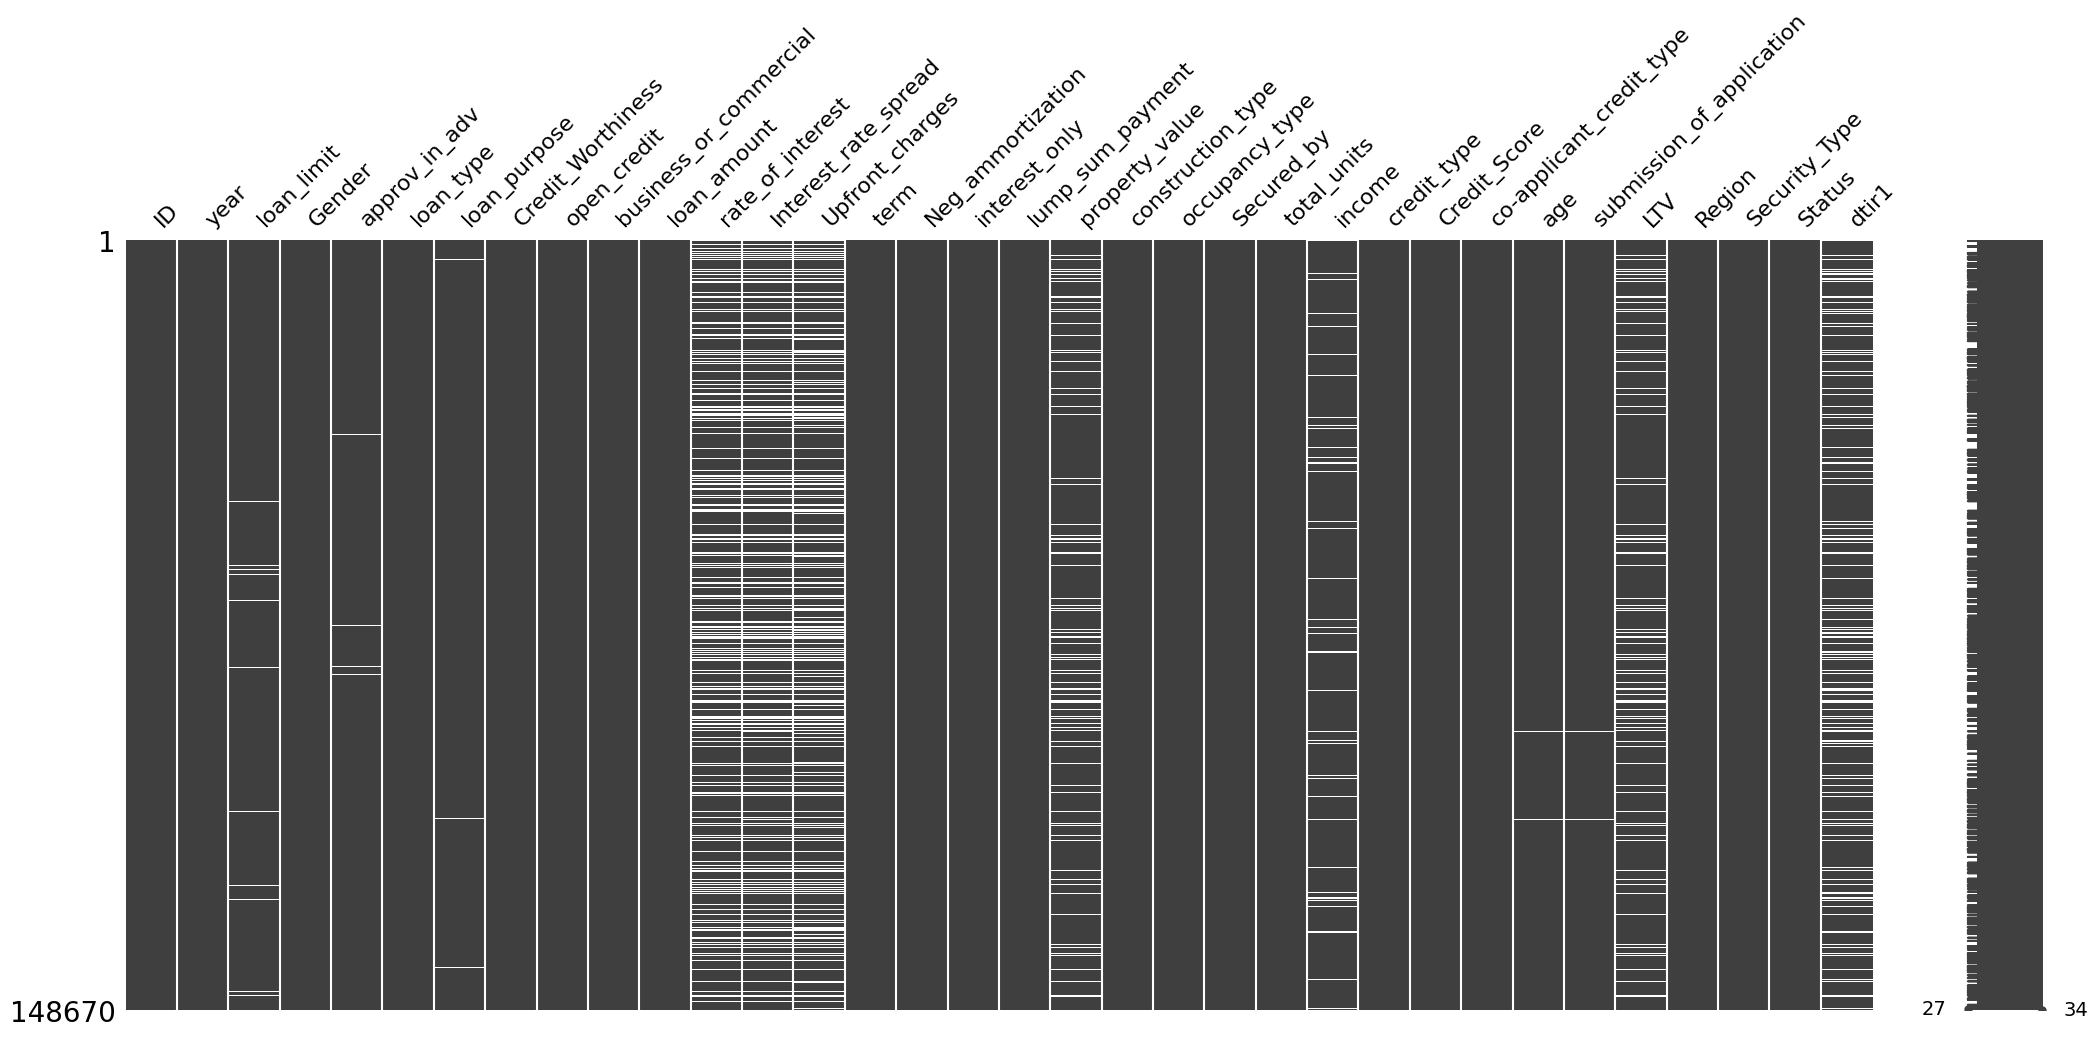

<Figure size 1500x900 with 0 Axes>

In [ ]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

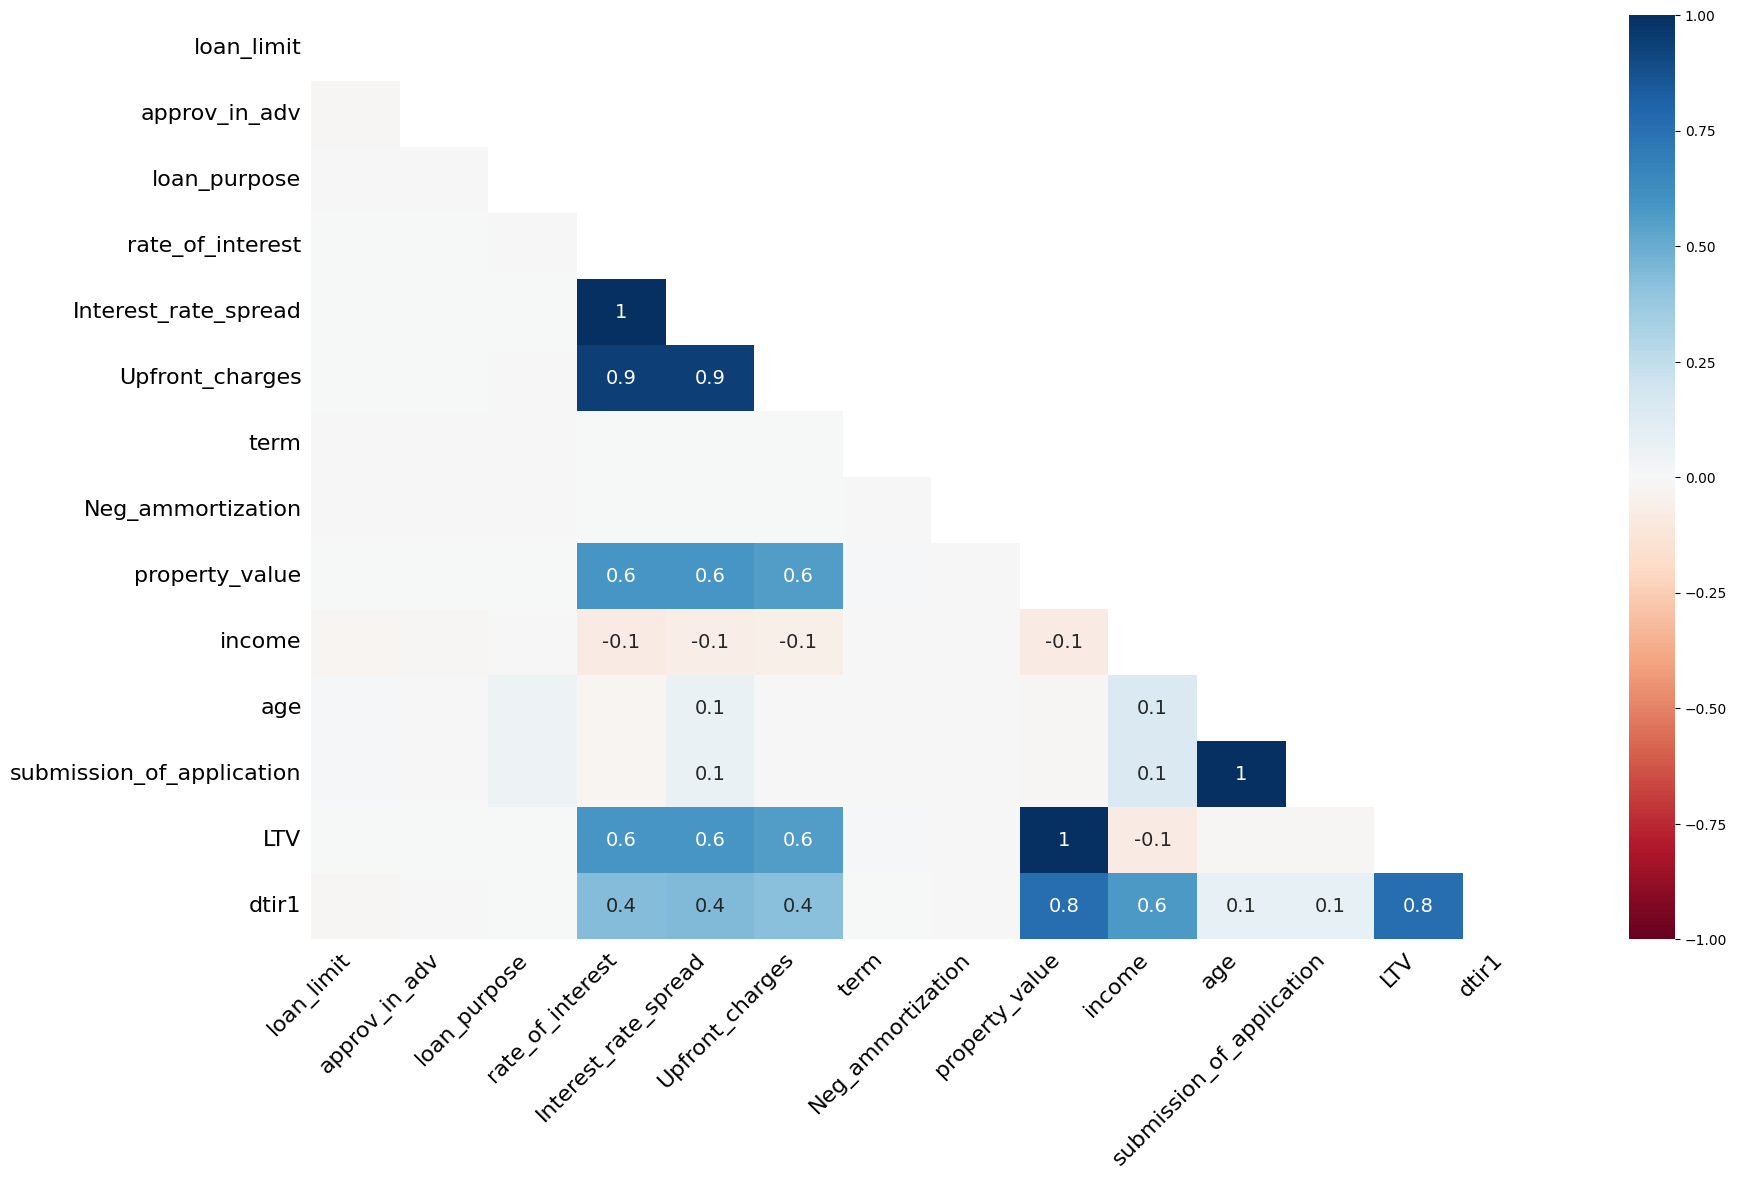

In [ ]:
msno.heatmap(df, labels = True)

In [ ]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

<Axes: >

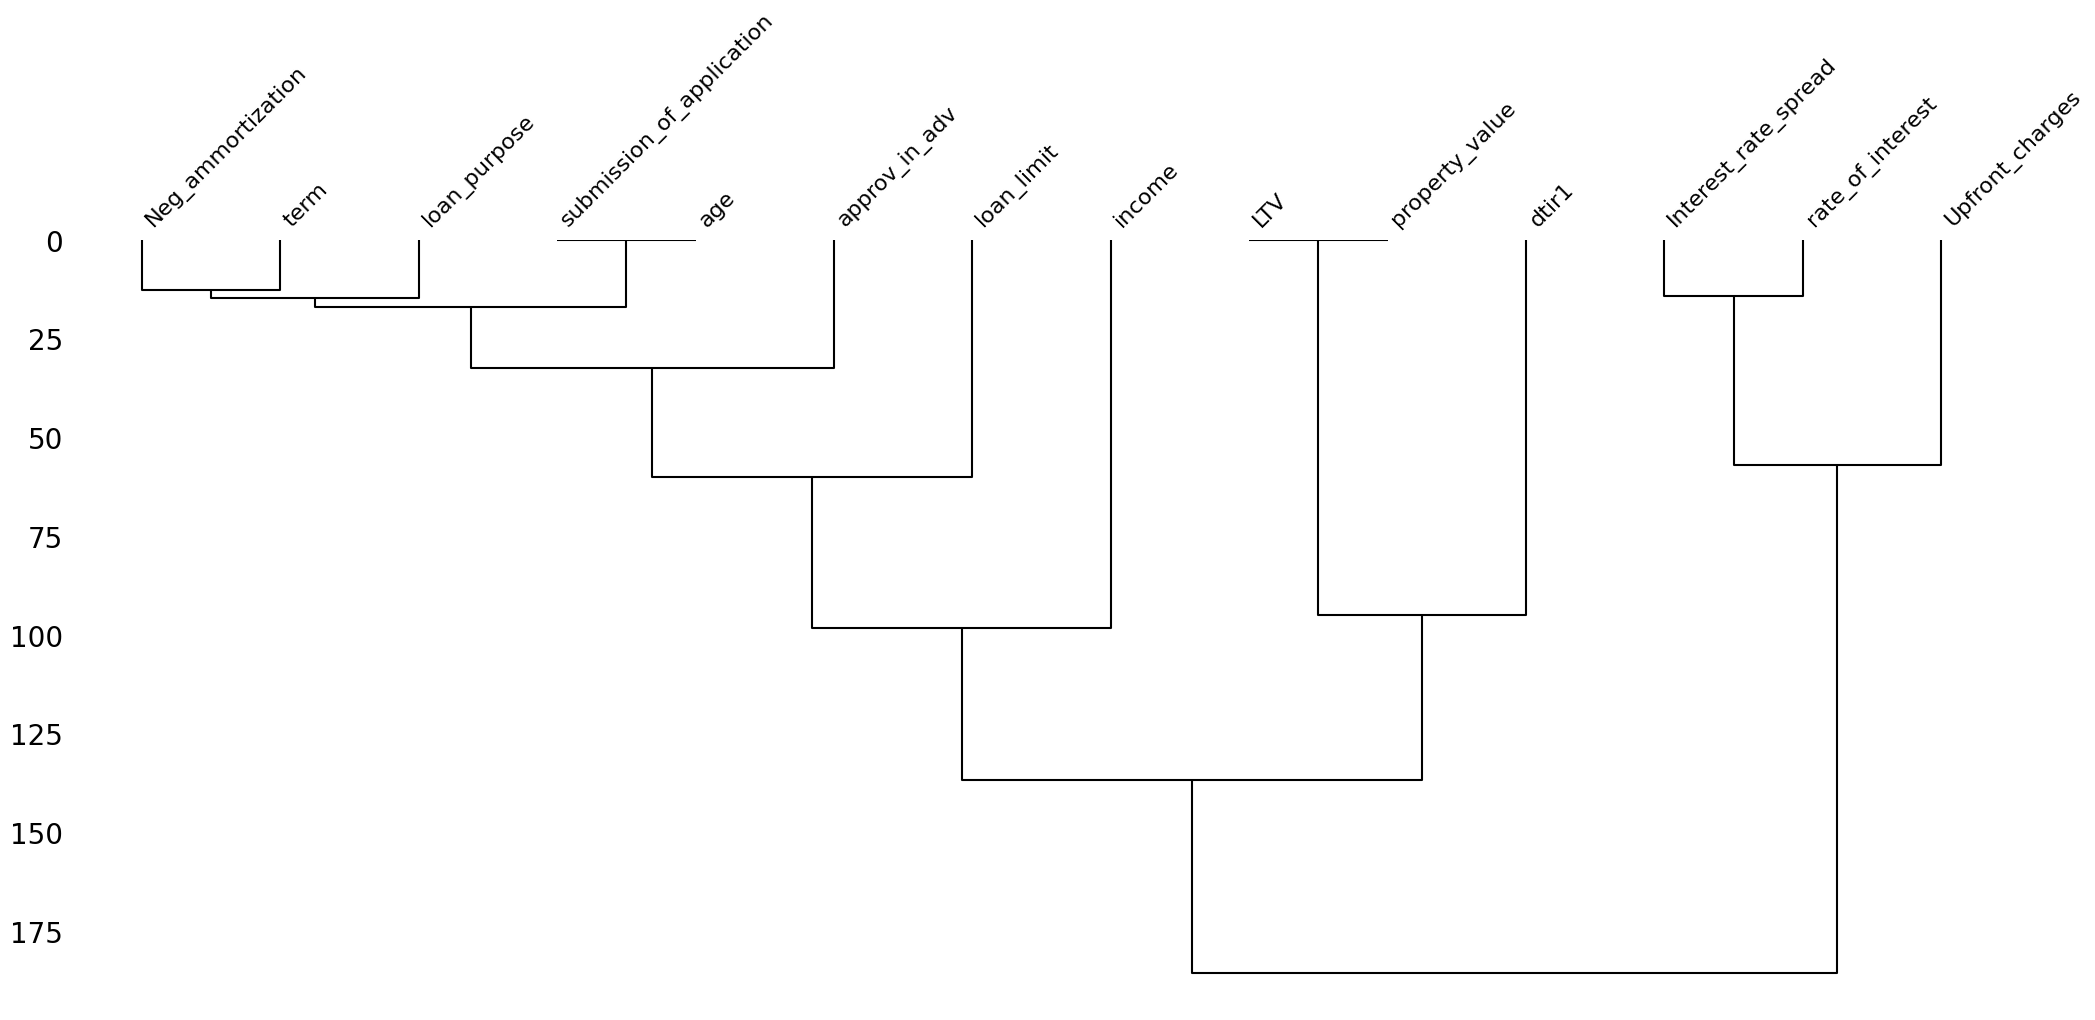

In [ ]:
msno.dendrogram(df[missing_columns])

In [ ]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [ ]:
missing_percent = get_numerical_summary(df)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [ ]:
df_temp = df.copy()

In [ ]:
# Threshold to remove attribute having missing values greater than threshold
ATTRIBUTE_THRESHOLD = 25 #25% in this case

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis = 1, inplace = True)

In [ ]:
_ = get_numerical_summary(df_temp)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [ ]:
del df_temp

In [ ]:
df_temp = df.copy()

In [ ]:
# Getting Missing count of each sample

for idx in range(df_temp.shape[0]):
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :].isnull().sum()

In [ ]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 5

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))

Samples Before Removal : 148670
Samples After Removal : 132360


In [ ]:
del df_temp

In [ ]:
cat_missing_cols = [col for col in missing_columns if df[col].dtype == 'object']
cat_missing_cols

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application']

In [ ]:
df.loan_limit.value_counts()

,count
loan_limit,
cf,135348
ncf,9978


In [ ]:
df[cat_missing_cols] = df[cat_missing_cols].fillna('Missing')
df.loan_limit.value_counts()

,count
loan_limit,
cf,135348
ncf,9978
Missing,3344


In [ ]:
df[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 148670 non-null  object
 1   approv_in_adv              148670 non-null  object
 2   loan_purpose               148670 non-null  object
 3   Neg_ammortization          148670 non-null  object
 4   age                        148670 non-null  object
 5   submission_of_application  148670 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


In [ ]:
from sklearn.impute import KNNImputer

df_temp = df.copy()

In [ ]:
num_cols = [col for col in df_temp.columns if df_temp[col].dtype != 'object']
print(num_cols)
df_temp = df_temp[num_cols]

['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


In [ ]:
# Initializing KNNImputer
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_temp)

KNNImputer(n_neighbors=3)

In [ ]:
X = knn.transform(df_temp)

In [ ]:
df_temp = pd.DataFrame(X, columns = num_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
del df_temp

In [ ]:
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()

In [ ]:
income = df['income']

In [ ]:
df_temp = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


def tree_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]
    # num_cols = [col for col in missing_cols if df[col].dtype != 'object']

    # df = df[num_cols]
    for col in missing_cols:

        # Defining a new bagging model for each attribute
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred

    return df

In [ ]:
df_new = tree_imputation(df_temp)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int64  
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  int64  
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  int64  
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670 non-null  int64  
 9   business_or_commercial     148670 non-null  int64  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [ ]:
msno.bar(df_new)
plt.show()

In [ ]:
df_new = pd.concat([df[cat_cols], df_new.drop(cat_cols, axis = 1)], axis = 1)
df_new.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,4.105500,0.630187,3612.590,360.0,118000.0,1740.0,758,98.728814,1,45.000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,3.521875,1.175565,1237.033,360.0,188500.0,4980.0,552,99.352471,1,40.625
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,4.560000,0.200000,595.000,360.0,508000.0,9480.0,834,80.019685,0,46.000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,4.250000,0.681000,13016.460,360.0,658000.0,11880.0,587,69.376900,0,42.000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,4.000000,0.304200,0.000,360.0,758000.0,10440.0,602,91.886544,0,39.000


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   Neg_ammortization          148670 non-null  object 
 9   interest_only              148670 non-null  object 
 10  lump_sum_payment           148670 non-null  object 
 11  construction_type          148670 non-null  object 
 12  occupancy_type             148670 non-null  object 
 13  Secured_by                 14

In [ ]:
f_temp = df_new.copy()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [ ]:
def likelihood_encoding(df, cat_cols, target_variable = "Status"):
    # cat_cols.remove(target_variable)
    df_temp = df.copy()
    for col in cat_cols:
        effect = {}
        print(col)
        for category in df[col].unique():
            print(category)

            try:
                temp = df[df[col] == category]
                lr = LogisticRegression()
                X = temp.drop(target_variable, axis = 1, inplace = False)
                y = temp[target_variable]
                # print(temp.drop(target_variable, axis = 1).isnull().sum())
                lr.fit(X, y)

                effect[category] = accuracy_score(y, lr.predict(X))
            except Exception as E:
                print(E)

        for key, value in effect.items():
            effect[key] = np.log(effect[key] / (1 - effect[key] + 1e-6))

        df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)
    return df_temp

In [ ]:
df_temp = likelihood_encoding(df_temp, cat_cols)

In [ ]:
df_temp.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,1,0,1,0,0,1,...,3,758,0,0,2,98.728814,3,1,1,45.000
1,24891,2019,1,2,1,1,1,0,0,0,...,2,552,1,3,2,99.352471,0,1,1,40.625
2,24892,2019,1,2,2,0,1,0,0,1,...,3,834,0,1,2,80.019685,3,1,0,46.000
3,24893,2019,1,2,1,0,4,0,0,1,...,3,587,0,2,1,69.376900,0,1,0,42.000
4,24894,2019,1,1,2,0,1,0,0,1,...,1,602,1,0,1,91.886544,0,1,0,39.000


In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int64  
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  int64  
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  int64  
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670 non-null  int64  
 9   business_or_commercial     148670 non-null  int64  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [ ]:
del df_temp

In [ ]:
def target_encoding(df, cat_cols, target_variable = "Status"):

    for col in cat_cols:
        weight = 7
        feat = df.groupby(col)[target_variable].agg(["mean", "count"])
        mean = feat['mean']
        count = feat['count']

        smooth = (count * mean + weight * mean) / (weight + count)

        df.loc[:, col] = df.loc[:, col].map(smooth)

    return df

In [ ]:
df_temp = df_new.copy()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [ ]:
df_temp = target_encoding(df_temp, cat_cols)

<ipython-input-53-f8e8530c0cc4>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.23970801 0.23970801 0.23970801 ... 0.23970801 0.23970801 0.23970801]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df.loc[:, col].map(smooth)
<ipython-input-53-f8e8530c0cc4>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.28590775 0.26191376 0.26191376 ... 0.26191376 0.25115528 0.25115528]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df.loc[:, col].map(smooth)
<ipython-input-53-f8e8530c0cc4>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.25327192 0.25327192 0.20893652 ... 0.25327192 0.25327192 0.25327192]' has dtype incompatible with int64, please explicitly 

In [ ]:
df_temp.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,0.239708,0.285908,0.253272,0.227749,0.258768,0.243277,0.246709,0.230377,0.223805,0.245105,...,4.105500,0.630187,3612.590,360.0,118000.0,1740.0,758,98.728814,1,45.000
1,0.239708,0.261914,0.253272,0.345439,0.258768,0.243277,0.246709,0.345439,0.223805,0.245105,...,3.521875,1.175565,1237.033,360.0,188500.0,4980.0,552,99.352471,1,40.625
2,0.239708,0.261914,0.208937,0.227749,0.258768,0.243277,0.246709,0.230377,0.445965,0.245105,...,4.560000,0.200000,595.000,360.0,508000.0,9480.0,834,80.019685,0,46.000
3,0.239708,0.261914,0.253272,0.227749,0.229749,0.243277,0.246709,0.230377,0.223805,0.245105,...,4.250000,0.681000,13016.460,360.0,658000.0,11880.0,587,69.376900,0,42.000
4,0.239708,0.191623,0.208937,0.227749,0.258768,0.243277,0.246709,0.230377,0.223805,0.245105,...,4.000000,0.304200,0.000,360.0,758000.0,10440.0,602,91.886544,0,39.000


In [ ]:
df['age'].value_counts()

,count
age,
45-54,34720
35-44,32818
55-64,32534
65-74,20744
25-34,19142
>74,7175
<25,1337
Missing,200


3RD DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
import warnings
warnings.filterwarnings('ignore')

READ CSV FILE

In [ ]:
loan = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [ ]:
print(f'Shape of Loan Dataset before dropping duplicated Row is: {loan.shape}')
loan = loan.drop_duplicates()
print(f'Shape of Loan Dataset After dropping duplicated Row is: {loan.shape}')

Shape of Loan Dataset before dropping duplicated Row is: (614, 13)
Shape of Loan Dataset After dropping duplicated Row is: (614, 13)


In [ ]:
loan = loan.drop("Loan_ID", axis=1)

In [ ]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

Dataset splitting for training, testing and validation


In [ ]:
# Splitting Data into Train, Validation, and Test Sets
X = loan.drop(columns='Loan_Status')
Y = loan['Loan_Status']

# Splitting into Train and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2,stratify=Y, shuffle=True, random_state = 40)

# Splitting Validation Set into Validation and Test Sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, shuffle=True, random_state = 40)


outliers

In [ ]:
class Plotter:

    def __init__(self, X, y):
        self.x_train = X
        self.y_train = y
        self.fig, self.axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
    def Plot_Box(self, row, col, x):
        ax = self.axes[row, col]
        sns.boxplot(data=self.x_train, x=x, y=self.y_train, ax=ax)
        ax.set_title(f"{x.capitalize()} vs. Loan_Status ")
    def Show_Plots(self):
        plt.tight_layout()
        plt.show()

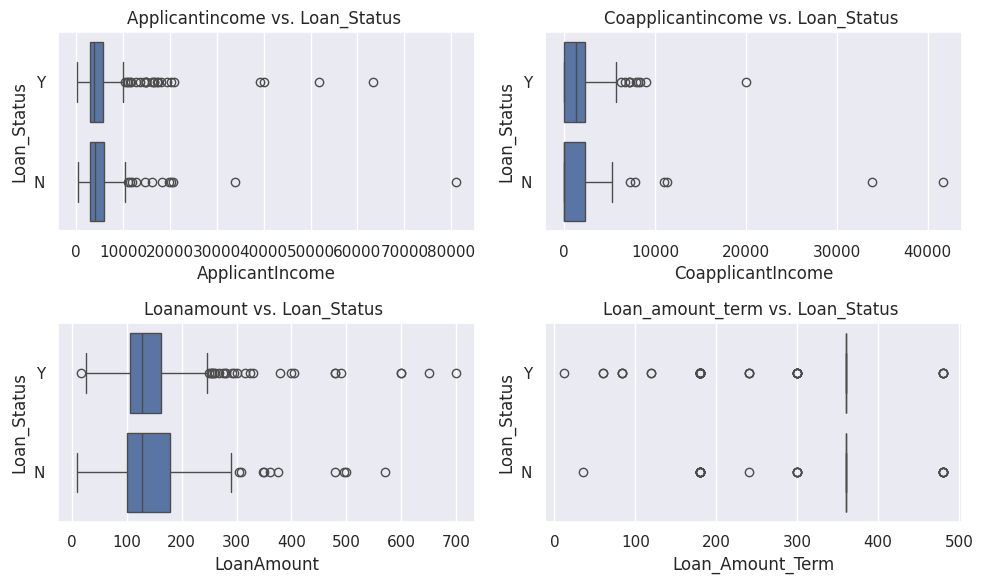

In [ ]:
plot_continuous_features = Plotter(X_train, y_train)

# Plot box plots
for i, col in enumerate(continuous_features):
    plot_continuous_features.Plot_Box(i // 2, i % 2, x=col)
plot_continuous_features.Show_Plots()

In [ ]:
result_df = pd.DataFrame(columns=['Features', 'Category', 'Count'])

for col in categorical_features:
    #value counts for the column
    value_counts = loan[col].value_counts().reset_index()
    value_counts.columns = ['Category', 'Count']
    value_counts['Features'] = col
    result_df = pd.concat([result_df, value_counts], ignore_index=True)

#result
grouped_df = result_df.groupby('Features').agg({'Category': list, 'Count': list})
grouped_df

,Category,Count
Features,,
Credit_History,"[1.0, 0.0]","[475, 89]"
Dependents,"[0, 1, 2, 3+]","[345, 102, 101, 51]"
Education,"[Graduate, Not Graduate]","[480, 134]"
Gender,"[Male, Female]","[489, 112]"
Married,"[Yes, No]","[398, 213]"
Property_Area,"[Semiurban, Urban, Rural]","[233, 202, 179]"
Self_Employed,"[No, Yes]","[500, 82]"


Handling Missing Values

In [ ]:
# Missing Value Analysis
def calculate_missing_values(X_train, X_val, X_test):
    Miss_Train = X_train.isna().sum()
    Miss_Val = X_val.isna().sum()
    Miss_test = X_test.isna().sum()

    # Convert the series to dataframes
    output_train = pd.DataFrame(Miss_Train, columns=['Missing Values X_train'])
    output_val = pd.DataFrame(Miss_Val, columns=['Missing Values X_val'])
    output_test = pd.DataFrame(Miss_test, columns=['Missing Values X_test'])

     # Concatenate the dataframes output_train and output_val
    output = pd.concat([output_train, output_val,output_test], axis=1, join='inner')

    return output

output = calculate_missing_values(X_train, X_val, X_test)


# Define a function to apply the desired styling
def color_cell(value):
    if value >=20 :
        return 'background-color:#2e9ee8'
    elif value >=10 and value <20 :
        return 'background-color:#7ac1f0'
    elif value >=1 and value <10 :
        return 'background-color:#bdddf2'
    return ''

# Apply the styling to the DataFrame
styled_df = output.style.applymap(color_cell)

styled_df


,Missing Values X_train,Missing Values X_val,Missing Values X_test
Gender,6,4,3
Married,2,0,1
Dependents,11,2,2
Education,0,0,0
Self_Employed,29,2,1
ApplicantIncome,0,0,0
CoapplicantIncome,0,0,0
LoanAmount,21,1,0
Loan_Amount_Term,12,0,2
Credit_History,42,4,4


Finding Rows with 50% or More Null Values

In [ ]:
def find_rows_with_high_null_values(df):
    threshold = 0.5
    # Getting DataFrame Name
    df_name = [name for name in globals() if globals()[name] is df][0]
    null_threshold = int(threshold * len(df.columns))
    null_rows = df[df.apply(lambda x: x.isnull().sum(), axis=1) >= null_threshold]
    num_null_rows = len(null_rows)
    print(f"The number of rows consisting of more than 50% missing values in {df_name} is: {num_null_rows}")


In [ ]:
# Example usage:
find_rows_with_high_null_values(X_train)
find_rows_with_high_null_values(X_val)
find_rows_with_high_null_values(X_test)

The number of rows consisting of more than 50% missing values in X_train is: 0
The number of rows consisting of more than 50% missing values in X_val is: 0
The number of rows consisting of more than 50% missing values in X_test is: 0


Handling missing values of continuous features

In [ ]:
# calculate mean columns

def calculate_mean(df, column):
    mean = df[column].mean().round()
    return mean

for col in ["LoanAmount","Loan_Amount_Term"]:
    print(f'Mean {col} in Trainset is: {calculate_mean(X_train, col)}')
    print(f'Mean {col} in Valset is: {calculate_mean(X_val, col)}')
    print(f'Mean {col} in Testset is: {calculate_mean(X_test, col)}')

Mean LoanAmount in Trainset is: 148.0
Mean LoanAmount in Valset is: 140.0
Mean LoanAmount in Testset is: 140.0
Mean Loan_Amount_Term in Trainset is: 341.0
Mean Loan_Amount_Term in Valset is: 346.0
Mean Loan_Amount_Term in Testset is: 346.0


In [ ]:
def fill_missing_values_by_mean(df, column):
    for col in cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

cols = ["LoanAmount","Loan_Amount_Term"]
X_train = fill_missing_values_by_mean(X_train, cols)
X_val = fill_missing_values_by_mean(X_val, cols)
X_test = fill_missing_values_by_mean(X_test, cols)

Handling missing values of categorical features

In [ ]:

Isna_cate = ['Gender', 'Married','Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Credit_History']

In [ ]:
def Get_Mode(df, cols):
    list_of_most_frequent = {}
    for col in cols:
        f = df[col].mode().iloc[0]
        list_of_most_frequent[col] = f
    return pd.DataFrame(list_of_most_frequent, index=['Most Frequent'])

In [ ]:
Get_Mode(X_train, Isna_cate)

,Gender,Married,Education,Dependents,Self_Employed,Property_Area,Credit_History
Most Frequent,Male,Yes,Graduate,0,No,Semiurban,1.0


In [ ]:
# Most frequent value for each categorical feature in X_Val
Get_Mode(X_val, Isna_cate)

,Gender,Married,Education,Dependents,Self_Employed,Property_Area,Credit_History
Most Frequent,Male,Yes,Graduate,0,No,Semiurban,1.0


In [ ]:
# Most frequent value for each categorical feature in X_test
Get_Mode(X_test, Isna_cate)

,Gender,Married,Education,Dependents,Self_Employed,Property_Area,Credit_History
Most Frequent,Male,Yes,Graduate,0,No,Semiurban,1.0


In [ ]:
def Fill_Null(df,cols):

    for col in cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    return df

X_train = Fill_Null(X_train, Isna_cate)
X_val = Fill_Null(X_val, Isna_cate)
X_test = Fill_Null(X_test, Isna_cate)

In [ ]:
for df in [X_train, X_val, X_test]:
    df['Credit_History'] = df['Credit_History'].astype(int)

In [ ]:
X_train.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
X_val.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
X_test.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


convering categories into nominal and ordinal

In [ ]:
Nominal_fetaures = ['Gender', 'Married','Education', 'Self_Employed', 'Property_Area']

In [ ]:
# Encoding Categorical Features
def encode_categorical_features(df, cols):

    for col in cols:
        # Check if the column exists before creating dummies
        if col in df.columns:
            dummies = pd.get_dummies(df[col], dtype=int, prefix=col)
            df = pd.concat([df, dummies], axis=1)
            df = df.drop(labels=col, axis=1)
    return df

# Encode the categorical features in the training and test sets
X_train = encode_categorical_features(X_train, Nominal_fetaures)
X_val = encode_categorical_features(X_val, Nominal_fetaures)
X_test = encode_categorical_features(X_test, Nominal_fetaures)

In [ ]:
encoder = {'0': 1/4, '1': 2/4, '2': 3/4, '3+': 4/4}
for df in [X_train, X_val, X_test]:
    df["Dependents"] = df['Dependents'].map(encoder)

In [ ]:
X_train.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
101,0.25,4843,3806.0,151.0,360.0,1,0,1,1,0,1,0,1,0,0,1,0
116,0.25,3167,2283.0,154.0,360.0,1,1,0,0,1,1,0,1,0,0,1,0
191,0.25,12000,0.0,164.0,360.0,1,0,1,1,0,1,0,1,0,0,1,0
237,0.25,3463,0.0,122.0,360.0,1,1,0,1,0,1,0,0,1,0,0,1
222,0.25,2971,2791.0,144.0,360.0,1,0,1,1,0,1,0,1,0,0,1,0
75,0.25,3750,0.0,113.0,480.0,1,0,1,1,0,1,0,1,0,0,0,1
261,0.25,2060,2209.0,134.0,360.0,1,0,1,1,0,1,0,1,0,0,1,0
469,0.25,4333,2451.0,110.0,360.0,1,0,1,0,1,1,0,1,0,0,0,1
110,0.25,5316,0.0,136.0,360.0,1,0,1,1,0,1,0,1,0,0,0,1
583,0.50,1880,0.0,61.0,360.0,1,0,1,0,1,1,0,1,0,1,0,0


Balance train set

In [ ]:
mapping = {'Y': 1,'N': 0}
y_train = pd.Series(y_train).map(mapping)
y_val = pd.Series(y_val).map(mapping)
y_test = pd.Series(y_test).map(mapping)

Text(0.5, 1.0, 'SMOTE Resampled Data')

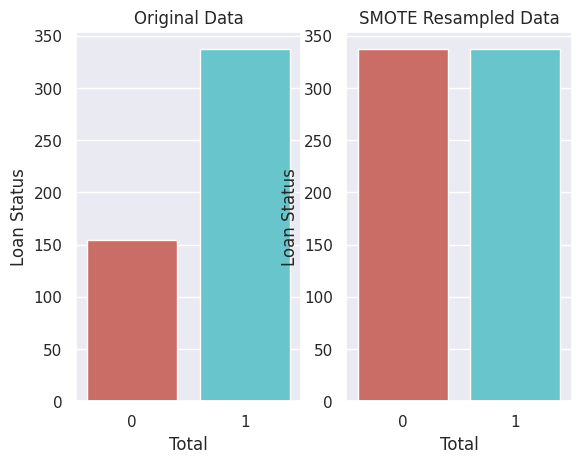

In [ ]:
# First figure
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, data=X_train, palette='hls')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('Original Data')

# Second figure
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
plt.subplot(1, 2, 2)
sns.countplot(x=y_train, data=X_train, palette='hls')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('SMOTE Resampled Data')

Correlation Analysis

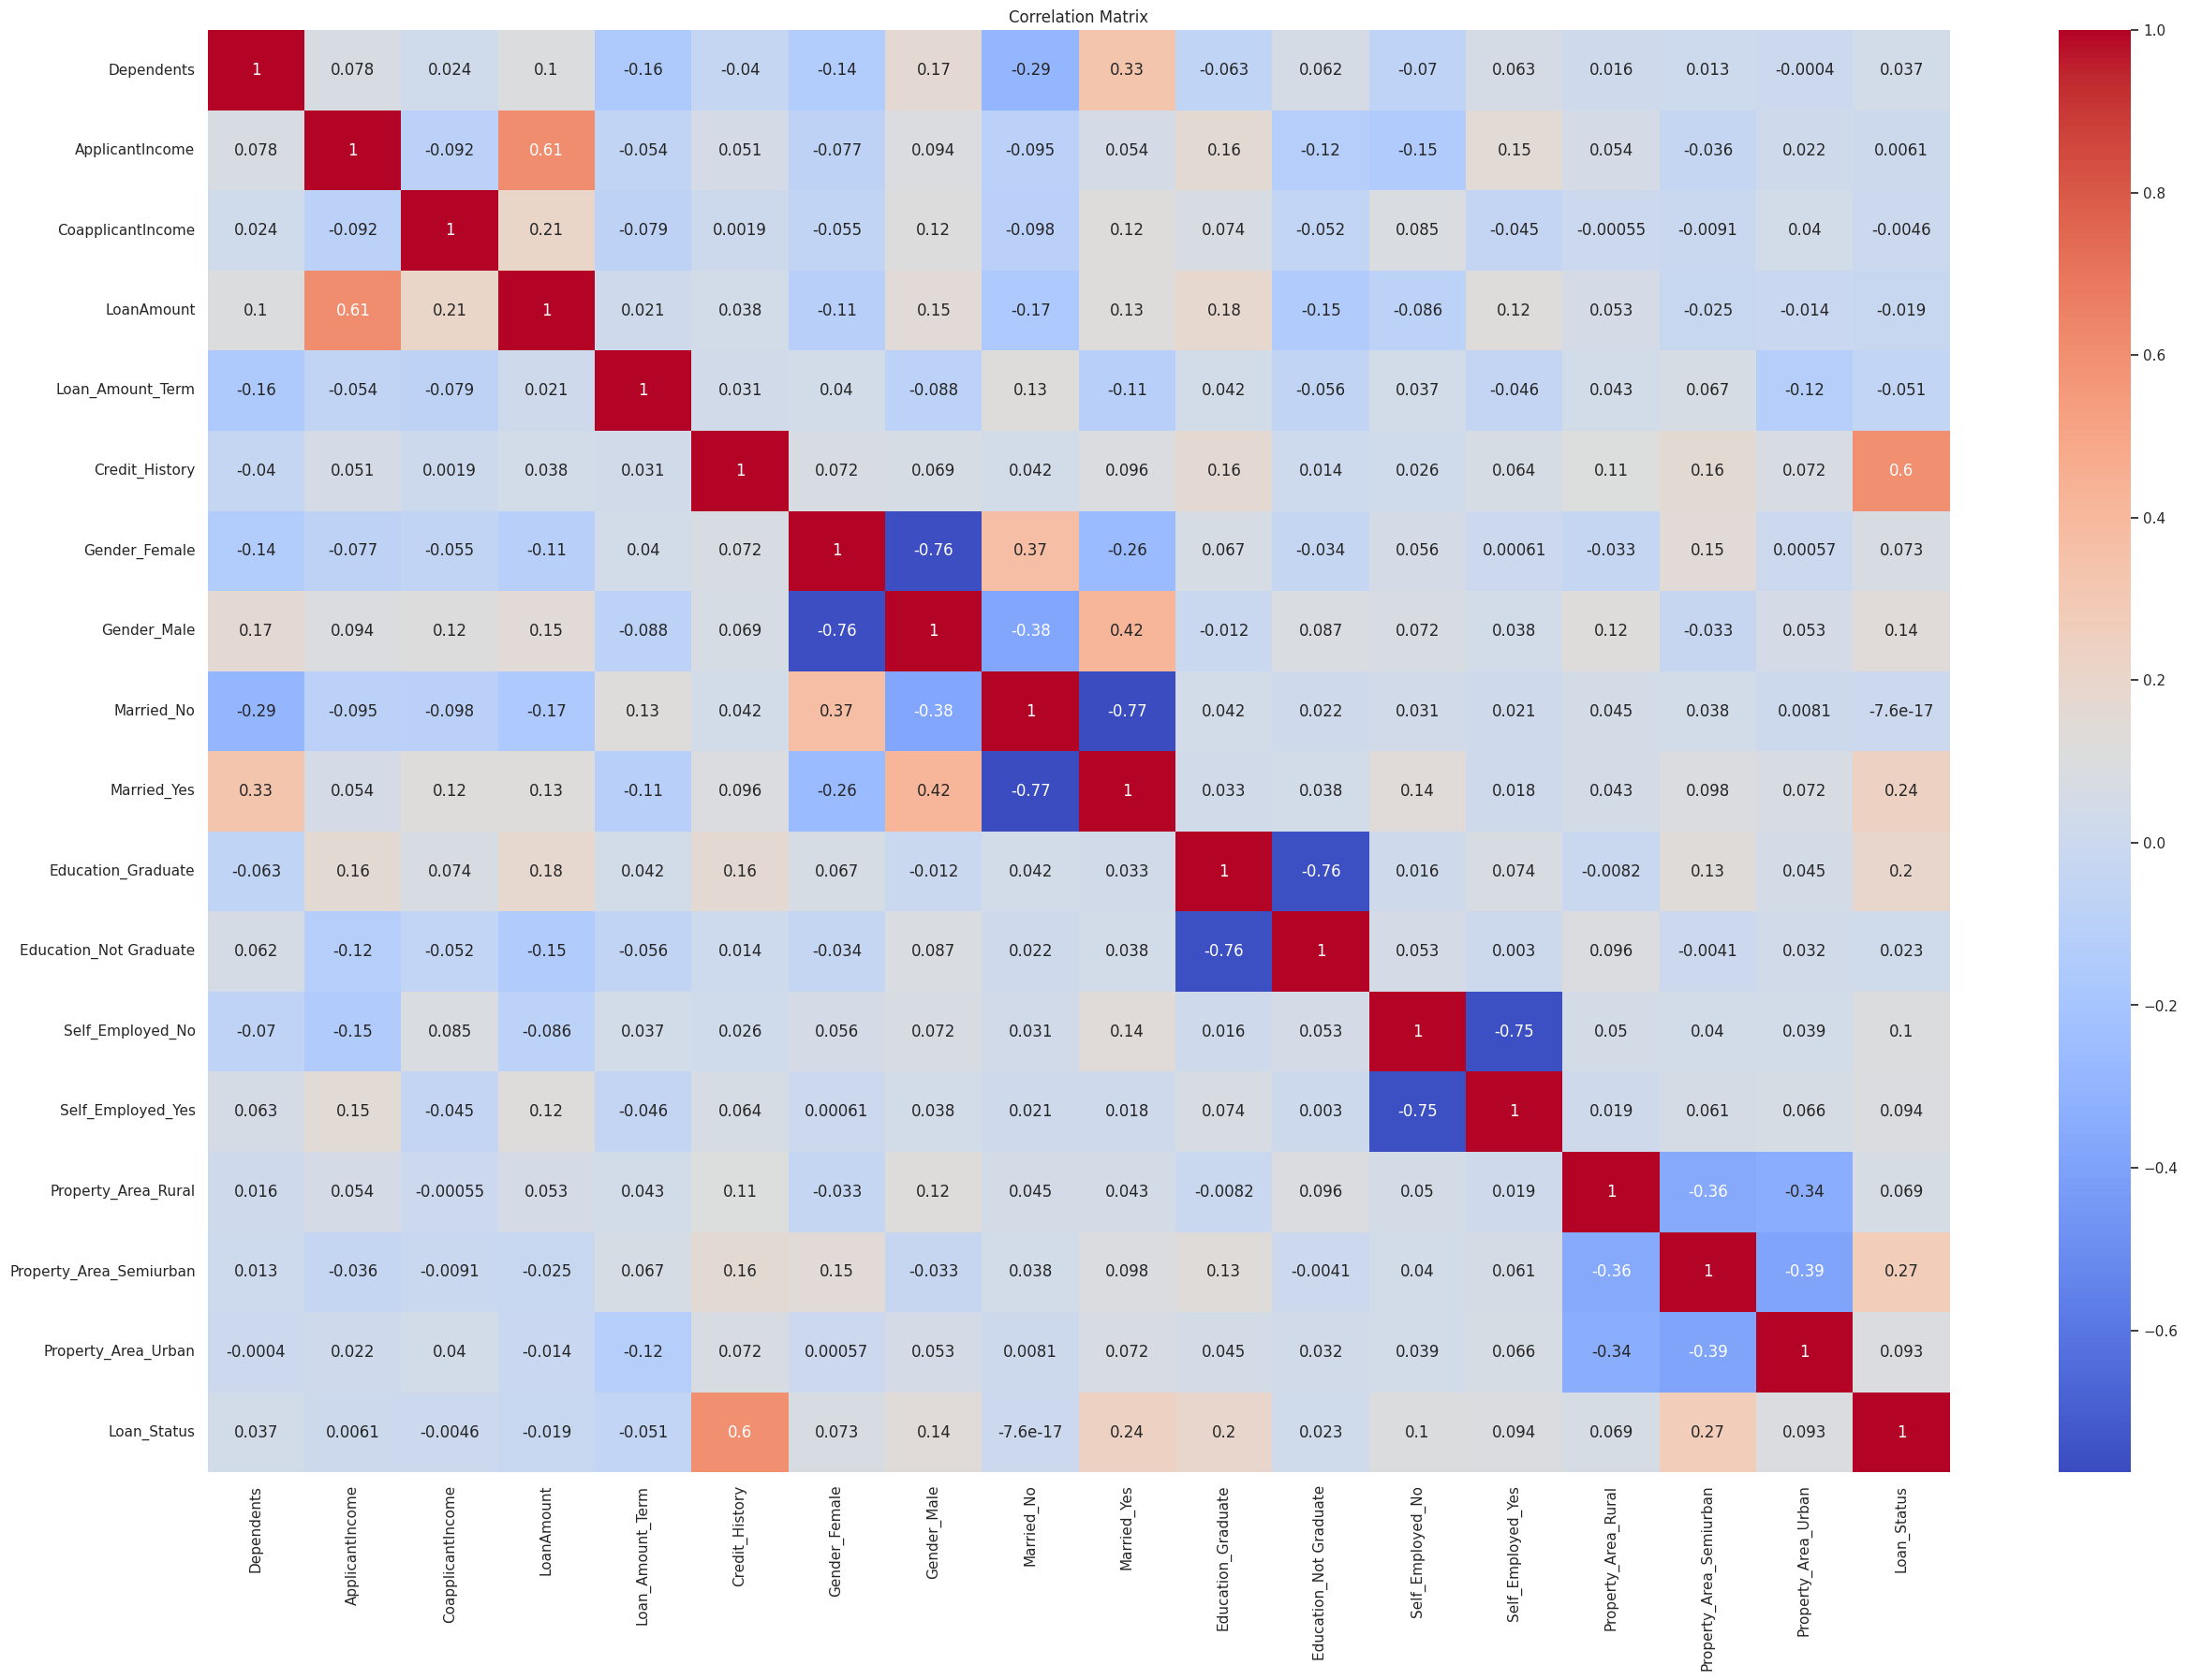

In [ ]:
train_copy = pd.concat([X_train, y_train], axis=1)
corr_matrix =train_copy.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

Mutual Information

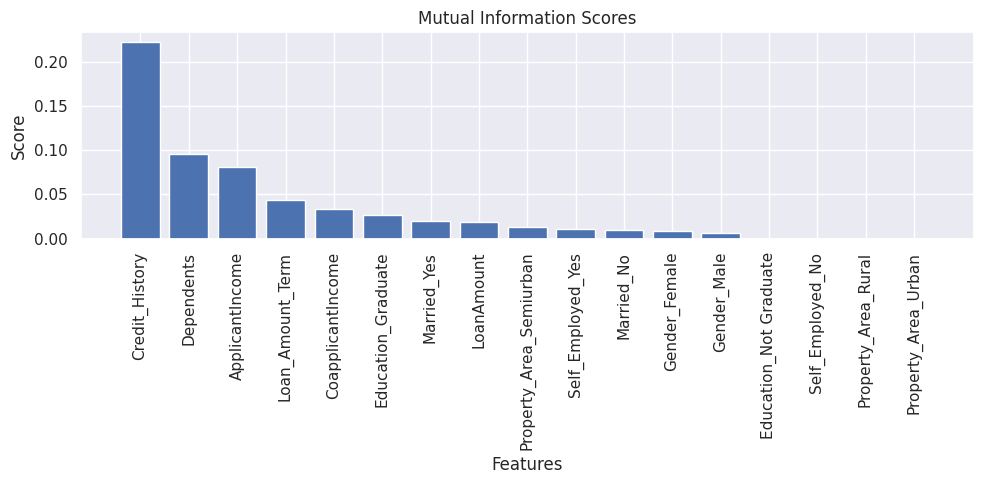

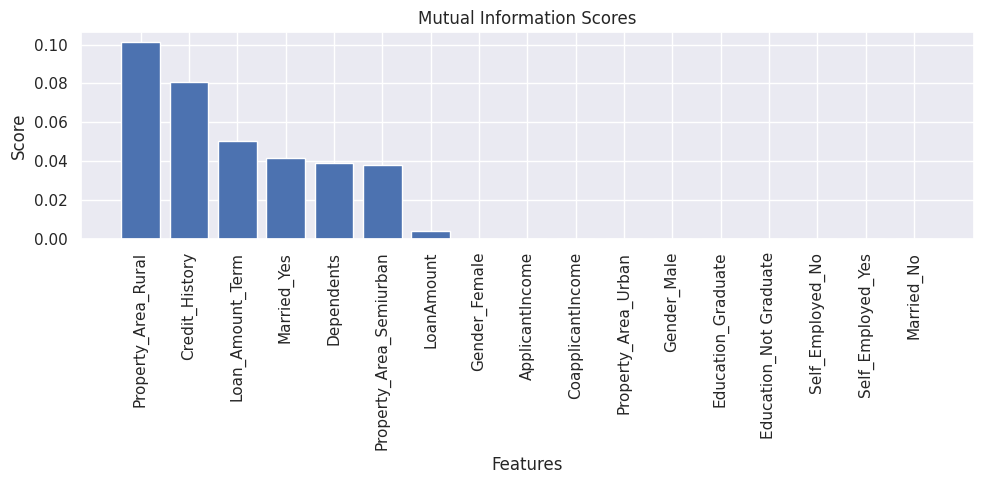

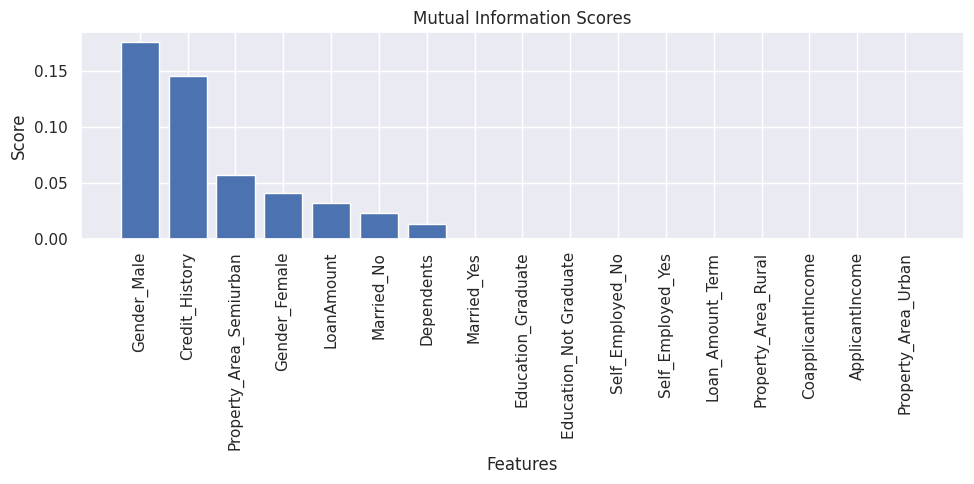

In [ ]:
for X, y in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    feature_names = X.columns
    scores = mutual_info_classif(X, y)

    #Create an array of indices for sorting the scores and feature names
    indices = np.argsort(scores)[::-1]

    #Sort the scores and feature names based on the indices
    sorted_scores = scores[indices]
    sorted_feature_names = [feature_names[i] for i in indices]

    #bar chart plotting
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(sorted_scores)), sorted_scores)
    plt.xticks(range(len(sorted_scores)), sorted_feature_names, rotation='vertical')

    plt.title("Mutual Information Scores")
    plt.xlabel("Features")
    plt.ylabel("Score")
    plt.tight_layout()
    plt.show()

In [ ]:
# Dropping Features with 0.0 scores in MI

drop_fetaures = ['Dependents', 'CoapplicantIncome','Loan_Amount_Term', 'Gender_Female', 'Married_Yes',
                 'Education_Graduate', 'Self_Employed_No', 'Self_Employed_Yes','Property_Area_Urban']
def Dropping(df, cols):
    for col in cols:
        df = df.drop(labels=col, axis=1)
    return df

In [ ]:
X_train = Dropping(X_train, drop_fetaures)
X_val = Dropping(X_val, drop_fetaures )
X_test = Dropping(X_test, drop_fetaures )

feature scaling

In [ ]:
scaler = StandardScaler()
X_V = X_val.values
X_T = X_test.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_val = scaler.transform(X_V)
scaled_x_test = scaler.transform(X_T)

Feature Extraction

In [ ]:
# Dimensionality Reduction with PCA
pca = PCA(n_components = 7)
train_reduced = pca.fit_transform(scaled_x_train)
val_reduced = pca.transform(scaled_x_val)
test_reduced = pca.transform(scaled_x_test)

 Introducing Preprocessor Class

In [ ]:
loan= pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
loan = loan.drop("Loan_ID", axis=1)

In [ ]:
# Splitting Data into Train, Validation, and Test Sets
X = loan.drop(columns='Loan_Status')
Y = loan['Loan_Status']

# Splitting into Train and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2,stratify=Y, shuffle=True, random_state = 40)

# Splitting Validation Set into Validation and Test Sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, shuffle=True, random_state = 40)

In [ ]:
class Preprocessor:
    def __init__(self, X_train, X_val, X_test, categorical_features, continuous_features):
        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.categorical_features = categorical_features
        self.continuous_features = continuous_features
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=7)

    def handle_missing_values_cont(self):
        for col in self.continuous_features:
            self.X_train[col].fillna(self.X_train[col].mean(), inplace=True)
            self.X_val[col].fillna(self.X_val[col].mean(), inplace=True)
            self.X_test[col].fillna(self.X_test[col].mean(), inplace=True)
        print("Missing values in continuous columns handled.")
        return self.X_train, self.X_val ,self.X_test



    def handle_missing_values_cate(self):
        for col in self.categorical_features:
          self.X_train[col].fillna(self.X_train[col].mode()[0], inplace=True)
          self.X_val[col].fillna(self.X_val[col].mode()[0], inplace=True)
          self.X_test[col].fillna(self.X_test[col].mode()[0], inplace=True)
        print("Missing values in categorical columns handled.")
        return self.X_train, self.X_val ,self.X_test

    def encode_categorical_features(self):
        for col in self.categorical_features:
            if col == 'Dependents':
                encoder = {'0': 1/4, '1': 2/4, '2': 3/4, '3+': 4/4}
                self.X_train[col] = self.X_train[col].map(encoder)
                self.X_val[col] = self.X_val[col].map(encoder)
                self.X_test[col] = self.X_test[col].map(encoder)
            else:
                train_dummies = pd.get_dummies(self.X_train[col], dtype=int, prefix=col)
                val_dummies = pd.get_dummies(self.X_val[col], dtype=int, prefix=col)
                test_dummies = pd.get_dummies(self.X_test[col], dtype=int, prefix=col)
                self.X_train = pd.concat([self.X_train, train_dummies], axis=1).drop(labels=col, axis=1)
                self.X_val = pd.concat([self.X_val, val_dummies], axis=1).drop(labels=col, axis=1)
                self.X_test = pd.concat([self.X_test, test_dummies], axis=1).drop(labels=col, axis=1)
        print("Categorical features encoded.")
        return self.X_train, self.X_val ,self.X_test

    def Scaling(self):
        self.V = self.X_val.values
        self.T = self.X_test.values
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_val = self.scaler.transform(self.V)
        self.X_test = self.scaler.transform(self.T)
        print("All DataSets Scaled!")
        return self.X_train, self.X_val ,self.X_test

    def DR(self):
        self.X_train = self.pca.fit_transform(self.X_train)
        self.X_val = self.pca.transform(self.X_val)
        self.X_test = self.pca.transform(self.X_test)
        print("Dimensionality reduction (PCA) applied on All DataSet")
        return self.X_train, self.X_val ,self.X_test

In [ ]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

preprocessor = Preprocessor(X_train,X_val,X_test ,categorical_features, continuous_features)


no_miss_X_train, no_miss_X_val ,no_miss_X_test = preprocessor.handle_missing_values_cont()
no_miss_X_train, no_miss_X_val ,no_miss_X_test = preprocessor.handle_missing_values_cate()
preprocessed_X_train, preprocessed_X_val ,preprocessed_X_test = preprocessor.encode_categorical_features()

Missing values in continuous columns handled.
Missing values in categorical columns handled.
Categorical features encoded.


In [ ]:
scaled_X_train, scaled_X_val ,scaled_X_test = preprocessor.Scaling()
reduced_X_train, reduced_X_val ,reduced_X_test = preprocessor.DR()

All DataSets Scaled!
Dimensionality reduction (PCA) applied on All DataSet


Save Preprocessed DataSets

In [ ]:
preprocessed_X_train.to_csv('TrainSet.csv', index=False)
preprocessed_X_val.to_csv('ValidationSet.csv', index=False)
preprocessed_X_test.to_csv('TestSet.csv', index=False)